<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Notebook-Initialisation" data-toc-modified-id="Notebook-Initialisation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Notebook Initialisation</a></span></li><li><span><a href="#Data-Import/Export" data-toc-modified-id="Data-Import/Export-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Import/Export</a></span><ul class="toc-item"><li><span><a href="#Import-Local-Test" data-toc-modified-id="Import-Local-Test-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Import Local Test</a></span></li><li><span><a href="#Import-from-API" data-toc-modified-id="Import-from-API-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Import from API</a></span></li><li><span><a href="#Dataframe-cleaning-and-preparation" data-toc-modified-id="Dataframe-cleaning-and-preparation-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Dataframe cleaning and preparation</a></span><ul class="toc-item"><li><span><a href="#XGBoost-regressor" data-toc-modified-id="XGBoost-regressor-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>XGBoost regressor</a></span></li><li><span><a href="#Holt-Winters" data-toc-modified-id="Holt-Winters-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Holt Winters</a></span></li></ul></li><li><span><a href="#Merge-CSV-and-API-test" data-toc-modified-id="Merge-CSV-and-API-test-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Merge CSV and API test</a></span></li><li><span><a href="#Data-Export" data-toc-modified-id="Data-Export-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Data Export</a></span></li></ul></li><li><span><a href="#Calculator" data-toc-modified-id="Calculator-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Calculator</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Time-Series-Plots" data-toc-modified-id="Time-Series-Plots-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Time Series Plots</a></span></li><li><span><a href="#Back2Back-Correlation-Plot" data-toc-modified-id="Back2Back-Correlation-Plot-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Back2Back Correlation Plot</a></span></li><li><span><a href="#Full-Seaborn-Correlogram" data-toc-modified-id="Full-Seaborn-Correlogram-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Full Seaborn Correlogram</a></span></li><li><span><a href="#Plots" data-toc-modified-id="Plots-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Plots</a></span><ul class="toc-item"><li><span><a href="#Prepare-dataframe" data-toc-modified-id="Prepare-dataframe-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Prepare dataframe</a></span></li><li><span><a href="#Heatmap" data-toc-modified-id="Heatmap-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>Heatmap</a></span></li><li><span><a href="#Vertical-Bar-Plot" data-toc-modified-id="Vertical-Bar-Plot-4.4.3"><span class="toc-item-num">4.4.3&nbsp;&nbsp;</span>Vertical Bar Plot</a></span></li></ul></li></ul></li><li><span><a href="#AlphaSense-Baseline-Calibration" data-toc-modified-id="AlphaSense-Baseline-Calibration-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>AlphaSense Baseline Calibration</a></span><ul class="toc-item"><li><span><a href="#Baseline-Model-Metrics" data-toc-modified-id="Baseline-Model-Metrics-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Baseline Model Metrics</a></span></li><li><span><a href="#TODO:-Correction-Checks" data-toc-modified-id="TODO:-Correction-Checks-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>TODO: Correction Checks</a></span></li></ul></li><li><span><a href="#TODO:-MICS-Baseline-Correction" data-toc-modified-id="TODO:-MICS-Baseline-Correction-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>TODO: MICS Baseline Correction</a></span></li><li><span><a href="#Data-Model-Creation" data-toc-modified-id="Data-Model-Creation-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Data Model Creation</a></span><ul class="toc-item"><li><span><a href="#Prepare-dataframe" data-toc-modified-id="Prepare-dataframe-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Prepare dataframe</a></span></li><li><span><a href="#Batch-Model-Process" data-toc-modified-id="Batch-Model-Process-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Batch Model Process</a></span></li><li><span><a href="#Ordinary-Linear-Regression" data-toc-modified-id="Ordinary-Linear-Regression-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Ordinary Linear Regression</a></span><ul class="toc-item"><li><span><a href="#Preliminary-Checks" data-toc-modified-id="Preliminary-Checks-7.3.1"><span class="toc-item-num">7.3.1&nbsp;&nbsp;</span>Preliminary Checks</a></span><ul class="toc-item"><li><span><a href="#Data-stationarity" data-toc-modified-id="Data-stationarity-7.3.1.1"><span class="toc-item-num">7.3.1.1&nbsp;&nbsp;</span>Data stationarity</a></span></li><li><span><a href="#Autocorrelation" data-toc-modified-id="Autocorrelation-7.3.1.2"><span class="toc-item-num">7.3.1.2&nbsp;&nbsp;</span>Autocorrelation</a></span></li><li><span><a href="#Granger-Casuality-Test-(use-with-caution)" data-toc-modified-id="Granger-Casuality-Test-(use-with-caution)-7.3.1.3"><span class="toc-item-num">7.3.1.3&nbsp;&nbsp;</span>Granger Casuality Test (use with caution)</a></span></li></ul></li><li><span><a href="#Model-definition" data-toc-modified-id="Model-definition-7.3.2"><span class="toc-item-num">7.3.2&nbsp;&nbsp;</span>Model definition</a></span></li><li><span><a href="#Model-prediction" data-toc-modified-id="Model-prediction-7.3.3"><span class="toc-item-num">7.3.3&nbsp;&nbsp;</span>Model prediction</a></span></li><li><span><a href="#Diagnostics-plots" data-toc-modified-id="Diagnostics-plots-7.3.4"><span class="toc-item-num">7.3.4&nbsp;&nbsp;</span>Diagnostics plots</a></span></li><li><span><a href="#Model-Export-to-Disk" data-toc-modified-id="Model-Export-to-Disk-7.3.5"><span class="toc-item-num">7.3.5&nbsp;&nbsp;</span>Model Export to Disk</a></span></li></ul></li><li><span><a href="#ML" data-toc-modified-id="ML-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>ML</a></span><ul class="toc-item"><li><span><a href="#LSTM" data-toc-modified-id="LSTM-7.4.1"><span class="toc-item-num">7.4.1&nbsp;&nbsp;</span>LSTM</a></span><ul class="toc-item"><li><span><a href="#Train-test-split" data-toc-modified-id="Train-test-split-7.4.1.1"><span class="toc-item-num">7.4.1.1&nbsp;&nbsp;</span>Train-test split</a></span></li><li><span><a href="#Model-fit-and-prediction" data-toc-modified-id="Model-fit-and-prediction-7.4.1.2"><span class="toc-item-num">7.4.1.2&nbsp;&nbsp;</span>Model fit and prediction</a></span></li><li><span><a href="#Model-plots" data-toc-modified-id="Model-plots-7.4.1.3"><span class="toc-item-num">7.4.1.3&nbsp;&nbsp;</span>Model plots</a></span></li></ul></li><li><span><a href="#Random-Forest-Regressor" data-toc-modified-id="Random-Forest-Regressor-7.4.2"><span class="toc-item-num">7.4.2&nbsp;&nbsp;</span>Random Forest Regressor</a></span><ul class="toc-item"><li><span><a href="#Train-test-split" data-toc-modified-id="Train-test-split-7.4.2.1"><span class="toc-item-num">7.4.2.1&nbsp;&nbsp;</span>Train-test split</a></span></li><li><span><a href="#Model-Fit" data-toc-modified-id="Model-Fit-7.4.2.2"><span class="toc-item-num">7.4.2.2&nbsp;&nbsp;</span>Model Fit</a></span></li><li><span><a href="#Model-plots" data-toc-modified-id="Model-plots-7.4.2.3"><span class="toc-item-num">7.4.2.3&nbsp;&nbsp;</span>Model plots</a></span></li></ul></li><li><span><a href="#SVM-Regressor" data-toc-modified-id="SVM-Regressor-7.4.3"><span class="toc-item-num">7.4.3&nbsp;&nbsp;</span>SVM Regressor</a></span><ul class="toc-item"><li><span><a href="#Train-test-split" data-toc-modified-id="Train-test-split-7.4.3.1"><span class="toc-item-num">7.4.3.1&nbsp;&nbsp;</span>Train test split</a></span></li><li><span><a href="#Model-Fit" data-toc-modified-id="Model-Fit-7.4.3.2"><span class="toc-item-num">7.4.3.2&nbsp;&nbsp;</span>Model Fit</a></span></li></ul></li><li><span><a href="#Model-archiving" data-toc-modified-id="Model-archiving-7.4.4"><span class="toc-item-num">7.4.4&nbsp;&nbsp;</span>Model archiving</a></span></li><li><span><a href="#Model-Export-to-Disk" data-toc-modified-id="Model-Export-to-Disk-7.4.5"><span class="toc-item-num">7.4.5&nbsp;&nbsp;</span>Model Export to Disk</a></span></li></ul></li><li><span><a href="#Model-Comparison" data-toc-modified-id="Model-Comparison-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Model Comparison</a></span><ul class="toc-item"><li><span><a href="#TimeSeries-Comparison" data-toc-modified-id="TimeSeries-Comparison-7.5.1"><span class="toc-item-num">7.5.1&nbsp;&nbsp;</span>TimeSeries Comparison</a></span></li><li><span><a href="#Scatter-Comparison" data-toc-modified-id="Scatter-Comparison-7.5.2"><span class="toc-item-num">7.5.2&nbsp;&nbsp;</span>Scatter Comparison</a></span></li><li><span><a href="#Model-Metrics-Comparison" data-toc-modified-id="Model-Metrics-Comparison-7.5.3"><span class="toc-item-num">7.5.3&nbsp;&nbsp;</span>Model Metrics Comparison</a></span></li></ul></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-7.6"><span class="toc-item-num">7.6&nbsp;&nbsp;</span>Model Evaluation</a></span><ul class="toc-item"><li><span><a href="#Data-Quality-Objectives" data-toc-modified-id="Data-Quality-Objectives-7.6.1"><span class="toc-item-num">7.6.1&nbsp;&nbsp;</span>Data Quality Objectives</a></span></li><li><span><a href="#Match-Score" data-toc-modified-id="Match-Score-7.6.2"><span class="toc-item-num">7.6.2&nbsp;&nbsp;</span>Match Score</a></span></li></ul></li></ul></li><li><span><a href="#Data-Model-Load" data-toc-modified-id="Data-Model-Load-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Data Model Load</a></span><ul class="toc-item"><li><span><a href="#Import-Model" data-toc-modified-id="Import-Model-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Import Model</a></span></li><li><span><a href="#Apply-OLS-Model" data-toc-modified-id="Apply-OLS-Model-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Apply OLS Model</a></span></li><li><span><a href="#Apply-ML-Model" data-toc-modified-id="Apply-ML-Model-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Apply ML Model</a></span><ul class="toc-item"><li><span><a href="#LSTM" data-toc-modified-id="LSTM-8.3.1"><span class="toc-item-num">8.3.1&nbsp;&nbsp;</span>LSTM</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-8.3.2"><span class="toc-item-num">8.3.2&nbsp;&nbsp;</span>Random Forest</a></span></li></ul></li></ul></li></ul></div>

# Notebook Initialisation

In [13]:
from os import getcwd, pardir
from os.path import join, abspath

# ! pip install jupyter_nbextensions_configurator jupyter_contrib_nbextensions
# ! jupyter contrib nbextension install
# ! jupyter nbextension install --py fileupload 
# ! jupyter nbextension enable --py fileupload
# ! jupyter nbextension install --py widgetsnbextension 
# ! jupyter nbextension enable --py widgetsnbextension
# ! jupyter nbextensions_configurator enable
# ! jupyter nbextension enable codefolding/main
# ! jupyter nbextension enable toc2/main

! jupyter nbextension enable --py --sys-prefix widgetsnbextension
# init_notebook_mode(connected=True)

## Get Root Directory
rootDirectory = abspath(join(abspath(join(getcwd(), pardir)), pardir))

# `do not disturb` mode
import warnings                                  
warnings.filterwarnings('ignore')

## Create a button that hides cells
from IPython.display import HTML

HTML(
    '''
    <script>
    code_show=true; 
    function code_toggle() {
        if (code_show){
            $('div.input').show();
        } else {
            $('div.input').hide();
        }
        code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

%load_ext autoreload
%autoreload 2

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---
# Data Import/Export

## Import Local Test

Import test from local test database. 

**Requirement**:

- Include where the directory of your tests is (GIT LFS directory)
- Make sure that the desired test is available and has been created with the yaml tool

**The cell below will**:

- Load all the kits within the test
- Check if there were alphasense sensors and retrieve their calibration data and order
- Check if there was a reference and convert it units

In [5]:
from test_utils import *

testsDir = join(rootDirectory, 'smartcitizen-iscape-data')

def loadButton(b):
    frequency = frequency_text.value + frequency_drop.value
    readings_selected = loadTest(frequency)
    if readings_selected.keys() == []:
        print 'Select a test to load'
    else:
        for key in readings_selected.keys():
            try:
                readings[key] = dict()
                readings[key] = readings_selected[key]
            except NameError:
                global readings
                readings = dict()
                readings[key] = readings_selected[key]

def clearButton(b):
    
    global readings
    clearTests()
    readings = {}

display(widgets.HTML('<hr><h4>Import Local Tests</h4>'))

tests = getTests(testsDir)
interact(selectTests,
         x = widgets.SelectMultiple(options=tests, 
                           selected_labels = selectedTests, 
                           layout=widgets.Layout(width='700px')))

loadB = widgets.Button(description='Load Local Tests')
loadB.on_click(loadButton)

frequency_text = widgets.Text(description = 'Frequency',
                              value = '1',
                              layout = widgets.Layout(width='300px'))
frequency_drop = widgets.Dropdown(options = ['H', 'Min', 'S'],
                                  value = 'Min',
                                  description = '',
                                  layout = widgets.Layout(width='100px'))

frequency_box = widgets.HBox([frequency_text, frequency_drop])

resetB = widgets.Button(description='Clear Tests')
resetB.on_click(clearButton)

buttonBox = widgets.HBox([loadB, resetB])
totalBox = widgets.VBox([frequency_box, buttonBox])
display(totalBox)

------------------------------------------------------


## Test Load

Loading test **2018-08_INT_STATION_TEST_SUMMER_HOLIDAYS**

<hr />
<p><strong>Comment:</strong> </p>
<p>Long term exposure for late-stage development station.</p>

### KIT

#### STATION CHIMNEY

Kit **STATION CHIMNEY** located **Europe/Madrid**

	Renaming column _GB_HUM_ to _EXT_HUM_
	Renaming column _GB_TEMP_ to _EXT_TEMP_
	**ALPHASENSE**
	{'O3': 204560314, 'SLOTS': ('CO', 'NO2', 'O3'), 'CO': 162031256, 'NO2': 202560430}


Kit **STATION CHIMNEY** has been loaded

#### STATION_CASE

Kit **STATION_CASE** located **Europe/Madrid**

	Renaming column _GB_TEMP_ to _EXT_TEMP_
	Renaming column _GB_HUM_ to _EXT_HUM_
	**ALPHASENSE**
	{'O3': 204560316, 'SLOTS': ('NO2', 'CO', 'O3'), 'CO': 162031257, 'NO2': 202160413}


Kit **STATION_CASE** has been loaded

------------------------------------------------------


## Import from API

In [ ]:
from api_utils import *
import re

def getDeviceDataInteractive(b):
    clear_output()
    frequency = frequency_text.value + frequency_drop.value
    devices = kitList.value.strip('').split(',')
    devicesCorrected = list()
    for device in devices: 
        device = re.sub(' ', '', device)
        devicesCorrected.append(device)
    test_name = testName.value
    # print devicesCorrected
    if test_name != '':
        try:
            readings[test_name] = dict()
            print frequency
            print start_date_widget.value, end_date_widget.value
            readings[test_name] = getReadingsAPI(devicesCorrected, frequency, start_date_widget.value, end_date_widget.value)
        except NameError:
            global readings
            readings = dict()
            readings[test_name] = getReadingsAPI(devicesCorrected, frequency, start_date_widget.value, end_date_widget.value)
    else:
        print 'Input test '

def getKitIDInteractive(b):
    clear_output()
    devices = kitList.value.strip('').split(',')
    kitIDs = list()
    for device in devices:
        kitID = getKitID(device, False)
        kitIDs.append(kitID)
        print('Device {} has kitID {}'.format(device, kitID))
    return kitIDs

kitList = widgets.Text(description = 'Kit List: ')
testName = widgets.Text(description = 'Input Test Name')

getKitIDb = widgets.Button(description='Get Kit ID')
getKitIDb.on_click(getKitIDInteractive)

loadAPIb = widgets.Button(description='Load API Kit')
loadAPIb.on_click(getDeviceDataInteractive)

frequency_text = widgets.Text(description = 'Frequency',
                              value = '1',
                              layout = widgets.Layout(width='300px'))
frequency_drop = widgets.Dropdown(options = ['H', 'Min', 'S'],
                                  value = 'Min',
                                  description = '',
                                  layout = widgets.Layout(width='50px'))

start_date_widget = widgets.DatePicker(description='Start Date')
end_date_widget = widgets.DatePicker(description='End Date')
dateBox = widgets.HBox([start_date_widget, end_date_widget])

frequency_box = widgets.HBox([frequency_text, frequency_drop])

Hbox = widgets.HBox([kitList, testName])
ButtonBox = widgets.HBox([getKitIDb, loadAPIb])
Box = widgets.VBox([Hbox, frequency_box, dateBox, ButtonBox])

display(Box)

## Dataframe cleaning and preparation

Inspired by the code of Dmitriy Sergeev at https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-9-time-series-analysis-in-python-a270cb05e0b3.

### XGBoost regressor

In [ ]:
%matplotlib inline

from signal_utils import mean_absolute_percentage_error, timeseries_train_test_split, \
                         plotModelResults, prepareDataFrame

test_name = '2018-12_INT_BENCHMARKING'
device_name = 'BME680'

## Ignore columns
irrelevantColumns = ['BATT', 'BATT_CHG_RATE', 'LIGHT', 'CO_MICS_THEAT', 'NO2_MICS_THEAT']
frequency = '1Min'

# Resample data
data = prepareDataFrame(readings[test_name]['devices'][device_name]['data'], 
                 frequency, irrelevantColumns, _plotModelAnom = True, 
                 _scaleAnom = 1.9, _methodAnom = 'before-after-avg')

# Make a copy to a 'CLEAN' keyword
readings[test_name]['devices'][device_name + '_CLEAN'] = dict()

# Put everything except data inside
for key in readings[test_name]['devices'][device_name].keys():
    if 'data' not in key:
        readings[test_name]['devices'][device_name + '_CLEAN'][key] = readings[test_name]['devices'][device_name][key]

# Put data inside
readings[test_name]['devices'][device_name + '_CLEAN']['data'] = data

### Holt Winters

Not recommended though.

In [ ]:
from holt_winters import *

test_name = '2018-08_INT_STATION_TEST_SUMMER_HOLIDAYS'
device_name = 'STATION_CASE'
channel = 'HUM'
data = readings[test_name]['devices'][device_name]['data'].loc[:,channel].copy()

data = data.dropna()

display(data.head(4))
display(data.describe())

slen = seasonality_day(test_name)

# initializing model parameters alpha, beta and gamma
x = [0, 0, 0] 

# Minimizing the loss function 
opt = minimize(timeseriesCVscore, x0=x, 
               args=(data, mean_absolute_error, 24), 
               method="TNC", bounds = ((0, 1), (0, 1), (0, 1)))

# ...and train the model with them
alpha_final, beta_final, gamma_final = opt.x

# alpha_final, beta_final, gamma_final = (0.005890895737085178, 0.004673709964305939, 0.01299124317761835)
print 'alpha, beta, gamma'
print(alpha_final, beta_final, gamma_final)

In [ ]:
_model = HoltWinters(data, slen = slen, 
                    alpha = alpha_final, 
                    beta = beta_final, 
                    gamma = gamma_final, 
                    n_preds = 0, scaling_factor = 5)

_model.triple_exponential_smoothing()

plotHoltWinters(data, _model, plot_intervals=True, plot_anomalies=True)

dataframe = pd.DataFrame(data)
column_data = dataframe.columns
dataframe['Anomalies'] = False
dataframe['Target'] = _model.series
dataframe['model'] = _model.result
dataframe['UpperBond'] = _model.UpperBond
dataframe['LowerBond'] = _model.LowerBond

def tag_anomalies(row):
    if (row['UpperBond'] < row ['Target']) or (row['LowerBond'] > row ['Target']):
        return True
    else:
        return False
    
dataframe['Anomalies'] = dataframe.apply(lambda row: tag_anomalies (row), axis = 1)

readings[test_name]['devices'][device_name]['data']['Anomalies'] = dataframe.Anomalies

## Merge CSV and API test

In [ ]:
from IPython.display import clear_output

def show_A_devices(Source):
    B_test.options = [k for k in readings.keys() if k != A_test.value]
    A_device.options = [s for s in list(readings[Source]['devices'].keys())]
    A_device.source = Source

def show_B_devices(Source):
    A_test.options = [k for k in readings.keys() if k != B_test.value]
    B_device.options = [s for s in list(readings[Source]['devices'].keys())]
    B_device.source = Source

def mergeCSVAPI(b):
    clear_output()
    try: 
        A_data = readings[A_test.value]['devices'][A_device.value]['data']
        B_data = readings[B_test.value]['devices'][B_device.value]['data']
    
        #print data_merged.index
        #print data_merging.index
        
        #data = pd.concat([data_merged, data_merging], axis = 0)
        #data = pd.merge(data_merged, data_merging, how='left', left_index=True, right_index=True)
        data = A_data.combine_first(B_data)
        # display(data)
        if testName.value not in readings: 
            readings[testName.value] = dict()
            readings[testName.value]['devices'] = dict()
        if deviceName.value not in readings[testName.value]['devices']: readings[testName.value]['devices'][deviceName.value] = dict()
        readings[testName.value]['devices'][deviceName.value]['data'] = data
    except:
        print 'Data could not be combined, review data'
    else:
        print 'Data Combined'

    if 'alphasense' in readings[A_test.value]['devices'][A_device.value]:
        if 'alphasense' in readings[B_test.value]['devices'][B_device.value]:
            if readings[A_test.value]['devices'][A_device.value]['alphasense'] == readings[B_test.value]['devices'][B_device.value]:
                print 'Both devices have matching alphasense data, using any of them'
                readings[testName.value]['devices'][deviceName.value]['alphasense'] = dict()
                readings[testName.value]['devices'][deviceName.value]['alphasense'] = readings[A_test.value]['devices'][A_device.value]['alphasense']
            else:
                print 'Alphasense data differs between both devices. Do it manually'
    elif 'alphasense' in readings[B_test.value]['devices'][B_device.value]:
        print 'A device does not have alphasense data, using B'
        readings[testName.value]['devices'][deviceName.value]['alphasense'] = readings[B_test.value]['devices'][B_device.value]['alphasense']
    else:
        'No alphasense information found. If any, input manually'
    
# Test dropdown
A_test = widgets.Dropdown(options=[k for k in readings.keys()], 
                        layout = widgets.Layout(width='500px'),
                        description = 'Test A')

A_test_drop = widgets.interactive(show_A_devices, 
                                Source=A_test, 
                                layout = widgets.Layout(width='500px'))

# Test dropdown
B_test = widgets.Dropdown(options=[k for k in readings.keys() if k != A_test.value], 
                        layout = widgets.Layout(width='500px'),
                        description = 'Test B')

B_test_drop = widgets.interactive(show_B_devices, 
                                Source=B_test, 
                                layout = widgets.Layout(width='500px'))

# Device dropdown
A_device = widgets.Dropdown(layout=layout,
                            description = 'Device A')

# Device dropdown
B_device = widgets.Dropdown(layout=layout,
                            description = 'Device B')

# New Test and device Name
testName = widgets.Text(description = 'New Test Name')
deviceName = widgets.Text(description = 'New Device Name ')
createTest = widgets.Button(description='Combine Tests')
createTest.on_click(mergeCSVAPI)

test_box = widgets.HBox([A_test_drop, B_test_drop], layout = widgets.Layout(width='500px'))
device_box = widgets.HBox([A_device, B_device], layout=widgets.Layout(justify_content='space-between'))
name_box = widgets.HBox([testName, deviceName, createTest])
root_box = widgets.VBox([test_box, device_box, name_box])
display(root_box)

## Data Export

In [ ]:
from IPython.display import FileLink
import os
global selected
selected = []

def selectedFilesChannels(x):
    selected = list(x)
    
selected_export=tuple()
def selectedDevices_export(Source):
    global selected_export
    selected_export = list(Source)
    
def show_device_export(Source):
    _devices_select_export.options = [s for s in list(readings[_test_export.value]['devices'].keys())]
    #_min_date.value = readings[Source].index.min()._short_repr
    #_max_date.value = readings[Source].index.max()._short_repr
    
def exportFile(b):
    for i in range(len(selected_export)):
        b.f = selected_export[i]
        exportDir = exportPath.value
        if not os.path.exists(exportDir): os.mkdir(exportDir)
        savePath = os.path.join(exportDir, b.f)
        if not os.path.exists(savePath):
            readings[_test_export.value]['devices'][b.f]['data'].to_csv(savePath + '.csv', sep=",")
            display(FileLink(savePath))
        else:
            display(widgets.HTML('File Already exists!'))

# Test dropdown
layout = widgets.Layout(width='400px')
_test_export = widgets.Dropdown(options=[k for k in readings.keys()], 
                        layout=layout,
                        description = 'Test')

_test_export_drop = widgets.interactive(show_device_export, 
                                Source=_test_export, 
                                layout=layout)

_devices_select_export = widgets.SelectMultiple(layout=widgets.Layout(width='700px'))
_devices_select_export_drop = interact(selectedDevices_export,
                                 Source = _devices_select_export)

display(widgets.HTML('<h3>Export Files</h3>'))
exportPath = widgets.Text(description = 'Type in export path  ', layout=widgets.Layout(width='700px'))
eb = widgets.Button(description='Export file', layout=widgets.Layout(width='150px'))
eb.on_click(exportFile)

selectBox = widgets.VBox([_test_export_drop, _devices_select_export])
exportBox = widgets.HBox([exportPath,eb])
_BOX=widgets.VBox([selectBox, exportBox])
display(_BOX)

# Calculator
Input your formulas into this cell for analysis in the plots below

There are formulas for calculating:
- *MICS* = Poly(R, H, T) - **MICS_FORMULA**
- *Alphasense's correction proposal* = f(Curr, Sens, Zero) - **AD_FORMULA**
- *Smoothing* = f(Signal, Window) - **SMOOTH**
- *Absolute humidity* = f(Temperature, Humidity, Pressure) - **ABS_HUM**

In [ ]:
from formula_utils import *
import pandas as pd
from IPython.display import display, clear_output
import ipywidgets as widgets

def show_device_list(Source):
    _devices_select.options = [s for s in list(readings[_test.value]['devices'].keys())]
    #_min_date.value = readings[Source].index.min()._short_repr
    #_max_date.value = readings[Source].index.max()._short_repr

def commonChannels(selected):
    global commonChannelsList
    commonChannelsList = []
    if (len(selected) == 1):
        commonChannelsList = readings[_test.value]['devices'][selected[0]]['data'].columns
    if (len(selected) > 1):
        commonChannelsList = readings[_test.value]['devices'][selected[0]]['data'].columns
        for s in list(selected):
            commonChannelsList = list(set(commonChannelsList) & set(readings[_test.value]['devices'][s]['data'].columns))
    _Aterm.options = list(commonChannelsList)
    _Aterm.source = selected
    _Bterm.options = list(commonChannelsList)
    _Bterm.source = selected
    _Cterm.options = list(commonChannelsList)
    _Cterm.source = selected
    _Dterm.options = list(commonChannelsList)
    _Dterm.source = selected
    
def calculateFormula(b):
    clear_output()
    A = _Aterm.value
    B = _Bterm.value
    C = _Cterm.value
    D = _Dterm.value
    Name = _formulaName.value
    for s in list(selected):
        result = functionFormula(s,A,B,C,D,readings)
        readings[_test.value]['devices'][s]['data'][Name] = result
    print "Formula {} Added in test {}".format(Name, _test.value)
    
def functionFormula(s, Aname, Bname, Cname, Dname, _readings): 
    calcData = pd.DataFrame()
    mergeData = pd.merge(pd.merge(pd.merge(_readings[_test.value]['devices'][s]['data'].loc[:,(Aname,)],_readings[_test.value]['devices'][s]['data'].loc[:,(Bname,)],left_index=True, right_index=True), _readings[_test.value]['devices'][s]['data'].loc[:,(Cname,)], left_index=True, right_index=True),_readings[_test.value]['devices'][s]['data'].loc[:,(Dname,)],left_index=True, right_index=True)
    calcData[Aname] = mergeData.iloc[:,0] #A
    calcData[Bname] = mergeData.iloc[:,1] #B
    calcData[Cname] = mergeData.iloc[:,2] #C
    calcData[Dname] = mergeData.iloc[:,3] #D
    A = calcData[Aname]
    B = calcData[Bname]
    C = calcData[Cname]
    D = calcData[Dname]
    result = eval(_formula.value)
    return result
        
selected=tuple()
def selectedDevices(Source):
    global selected
    selected = list(Source)
    commonChannels(selected)

# Test dropdown
layout = widgets.Layout(width='400px')
_test = widgets.Dropdown(options=[k for k in readings.keys()], 
                        layout=layout,
                        description = 'Test')

_test_drop = widgets.interactive(show_device_list, 
                                Source=_test, 
                                layout=layout)

_Aterm = widgets.Dropdown(description = 'A', layout=layout)
_Bterm = widgets.Dropdown(description = 'B', layout=layout)
_Cterm = widgets.Dropdown(description = 'C', layout=layout)
_Dterm = widgets.Dropdown(description = 'D', layout=layout)

_devices_select = widgets.SelectMultiple(layout=widgets.Layout(width='700px'))
_devices_select_drop = interact(selectedDevices,
                                 Source = _devices_select)

_selectBox = widgets.VBox([_test_drop, _devices_select])

_formulaName = widgets.Text(description = 'Name: ')
_formula = widgets.Text(description = '=')
_ABtermsBox = widgets.HBox([_Aterm, _Bterm])
_CDtermsBox = widgets.HBox([_Cterm, _Dterm])
_termsBox = widgets.VBox([_selectBox, _ABtermsBox, _CDtermsBox])
_calculate = widgets.Button(description='Calculate')
_calculateBox = widgets.HBox([_formulaName,_formula, _calculate])
_calculate.on_click(calculateFormula)

display(widgets.HTML('<hr><h4>Select the Files for your formulas to apply</h4>'))
display(_termsBox)
display(widgets.HTML('<h4>Input your formula Below</h4>'))
display(_calculateBox)

## Vapour equilibrium: B is temperature in degC, assumed 1013mbar
# (1.0007 + 3.46*1e-6*1013)*6.1121*np.exp(17.502*B/(240.97+B))

---
# Exploratory Data Analysis

## Time Series Plots

In [12]:
from IPython.display import display, Markdown, FileLink, FileLinks, clear_output, HTML
from IPython.core.display import HTML
from IPython.display import display, clear_output
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

# --
# Plotly
import plotly as ply
import plotly.graph_objs as go
from plotly.widgets import GraphWidget
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import Scatter, Layout
import plotly.tools as tls

import matplotlib.pyplot as plot

init_notebook_mode(connected=True)

# Plot Y limits
setLimits = False
maxY = 15000
minY = 0

toshow = []
axisshow = []
# meanTable = []

def show_devices(Source):
    _device.options = [s for s in list(readings[Source]['devices'].keys())]
    _device.source = Source
    #_min_date.value = readings[Source].index.min()._short_repr
    #_max_date.value = readings[Source].index.max()._short_repr

def show_sensors(Source):
    _sensor_drop.options = [s for s in list(readings[_test.value]['devices'][Source]['data'].columns)]
    _sensor_drop.source = Source
    _min_date.value = readings[_test.value]['devices'][Source]['data'].index.min()._short_repr
    _max_date.value = readings[_test.value]['devices'][Source]['data'].index.max()._short_repr

def clear_all(b):
    clear_output()
    del toshow[:]
    del axisshow[:]

def add_sensor(b):
    clear_output()
    d = [_device.source, _sensor_drop.source, _sensor_drop.value]
    
    if d not in toshow: 
        toshow.append(d)
        axisshow.append(_axis_drop.value)
        
    plot_data = readings[toshow[0][0]]['devices'][toshow[0][1]]['data'].loc[:,(toshow[0][2],)]
    list_data_primary = []
    list_data_secondary = []
    list_data_terciary = []
    
    if b.slice_time:
        plot_data = plot_data[plot_data.index > _min_date.value]
        plot_data = plot_data[plot_data.index < _max_date.value]
    
    if len(toshow) > 1:
        for i in range(1, len(toshow)):
            plot_data = pd.merge(plot_data, readings[toshow[i][0]]['devices'][toshow[i][1]]['data'].loc[:,(toshow[i][2],)], left_index=True, right_index=True)
    # plot_data = plot_data.groupby(pd.Grouper(freq='10Min')).aggregate(np.mean)    

    print ('-------------------------------------')
    print (' Medias:\n')
    meanTable = []
    for d in toshow:
        myMean = ' ' + d[1]  + "\t" + d[2] + "\t"
        meanTable.append(myMean)   
    res = plot_data.mean()
    for i in range(len(meanTable)): print (meanTable[i] + '%.2f' % (res[i]))
    print ('-------------------------------------')
    
    print ('-------------------------------------')
    print (' Std Deviation:\n')
    stdTable = []
    for d in toshow:
        myStd = ' ' + d[1]  + "\t" + d[2] + "\t"
        stdTable.append(myStd)   
    std = plot_data.std()
    for i in range(len(stdTable)): print stdTable[i] + '%.2f' % (std[i])
    print ('-------------------------------------')

    # Change columns naming
    changed = []
    for i in range(len(plot_data.columns)):
        changed.append(toshow[i][0] + ' - '+ toshow[i][1] + ' - '+ plot_data.columns[i])
    plot_data.columns = changed
    
    subplot_rows = 0
    if len(toshow) > 0:
        for i in range(len(toshow)):
            if axisshow[i]=='1': 
                list_data_primary.append(str(changed[i]))
                subplot_rows = max(subplot_rows,1)
            if axisshow[i]=='2': 
                list_data_secondary.append(str(changed[i]))
                subplot_rows = max(subplot_rows,2)
            if axisshow[i]=='3': 
                list_data_terciary.append(str(changed[i]))
                subplot_rows = max(subplot_rows,3)
          
    
    if _matplotly.value == 'Plotly':
        fig1 = tls.make_subplots(rows=subplot_rows, cols=1, shared_xaxes=_synchroniseXaxis.value)
    
        #if len(list_data_primary)>0:
            #fig1 = plot_data.iplot(kind='scatter', y = list_data_primary, asFigure=True, layout = layout)
        #ply.offline.iplot(fig1)
        
        for i in range(len(list_data_primary)):
            fig1.append_trace({'x': plot_data.index, 'y': plot_data[list_data_primary[i]], 'type': 'scatter', 'name': list_data_primary[i]}, 1, 1)
    
        for i in range(len(list_data_secondary)):
            fig1.append_trace({'x': plot_data.index, 'y': plot_data[list_data_secondary[i]], 'type': 'scatter', 'name': list_data_secondary[i]}, 2, 1)
        
        for i in range(len(list_data_terciary)):
            fig1.append_trace({'x': plot_data.index, 'y': plot_data[list_data_terciary[i]], 'type': 'scatter', 'name': list_data_terciary[i]}, 3, 1)
    
        if setLimits: 
            fig1['layout'].update(height = 800,
                                legend=dict(x=-.1, y=1.2) ,
                               xaxis=dict(title='Time'))
                              
        else:
            fig1['layout'].update(height = 800,
                                  legend=dict(x=-.1, y=1.2) ,
                               xaxis=dict(title='Time'))
                               
        ply.offline.plot(fig1)
        
    elif _matplotly.value == 'Matplotlib':
        
        fig, axes = plot.subplots(subplot_rows, 1, figsize=(15,10))
        # Four axes, returned as a 2-d array
        
        if subplot_rows == 1:
            for i in range(len(list_data_primary)):
                axes.plot(plot_data.index, plot_data[list_data_primary[i]], label =  list_data_primary[i])
                axes.legend(loc='best')

        else:
            for i in range(len(list_data_primary)):
                axes[0].plot(plot_data.index, plot_data[list_data_primary[i]], label =  list_data_primary[i])
                axes[0].legend(loc='best')
                axes[0].grid(visible = True)

            for i in range(len(list_data_secondary)):
                axes[1].plot(plot_data.index, plot_data[list_data_secondary[i]], label =  list_data_secondary[i])
                axes[1].legend(loc='best')
                axes[1].grid(visible = True)

            for i in range(len(list_data_terciary)):
                axes[2].plot(plot_data.index, plot_data[list_data_terciary[i]], label =  list_data_terciary[i])
                axes[2].legend(loc='best')
                axes[2].grid(visible = True)

        plot.xlabel('Date') 
        plot.grid(visible = True)
        plot.show()
        
    
def reset_time(b):
    _min_date.value = readings[b.src.value].index.min()._short_repr
    _max_date.value = readings[b.src.value].index.max()._short_repr

layout=widgets.Layout(width='330px')

# Test dropdown
_test = widgets.Dropdown(options=[k for k in readings.keys()], 
                        layout=layout,
                        description = 'Test')

_test_drop = widgets.interactive(show_devices, 
                                Source=_test, 
                                layout=layout)

# Device dropdown
_device = widgets.Dropdown(layout=layout,
                        description = 'Device')

_device_drop = widgets.interactive(show_sensors, 
                                Source=_device, 
                                layout=layout)

# Sensor dropdown
_sensor_drop = widgets.Dropdown(layout=layout,
                               description = 'Channel')

# Buttons
_b_add = widgets.Button(description='Add to Plot', layout=widgets.Layout(width='120px'))
_b_add.on_click(add_sensor)
_b_add.slice_time = False
_b_reset_all = widgets.Button(description='Clear all', layout=widgets.Layout(width='120px'))
_b_reset_all.on_click(clear_all)

# Axis dropdown
_axis_drop = widgets.Dropdown(
    options=['1', '2', '3'],
    value='1',
    description='Subplot:',
    disabled=False,
)

# Synchronise Checkbox
_synchroniseXaxis = widgets.Checkbox(value=False, 
                                     description='Synchronise X axis', 
                                     disabled=False, 
                                     layout=widgets.Layout(width='300px'))

_matplotly = widgets.RadioButtons(
    options=['Matplotlib', 'Plotly'], value='Matplotlib',
    description='Plot Type',
    disabled=False
)

# Date fields
_min_date = widgets.Text(description='Start date:', 
                         layout=widgets.Layout(width='330px'))
_max_date = widgets.Text(description='End date:', 
                         layout=widgets.Layout(width='330px'))

# Date buttons
_b_apply_time = _b_reset = widgets.Button(description='Apply dates', layout=widgets.Layout(width='100px'))
_b_apply_time.on_click(add_sensor)
_b_apply_time.slice_time = True
_b_reset_time = _b_reset = widgets.Button(description='Reset dates', layout=widgets.Layout(width='100px'))
_b_reset_time.on_click(reset_time)
#_b_reset_time.src = _kit


_device_box = widgets.HBox([_test_drop, _device_drop])
_sensor_box = widgets.HBox([_sensor_drop, _axis_drop, _synchroniseXaxis])
_plot_type_box = widgets.VBox([_matplotly])

_plot_box = widgets.HBox([_b_add , _b_reset_all])
_time_box = widgets.HBox([_min_date,_max_date, _b_reset_time, _b_apply_time])
_root_box = widgets.VBox([_matplotly, _time_box, _device_box, _sensor_box, _plot_box])
display(_root_box)

## Back2Back Correlation Plot

In [ ]:
cropTime = False
min_date = "2001-01-01 00:00:01"
max_date = "2001-01-01 00:00:01"
doubleAxis = True

from sklearn.metrics import mean_squared_error
from math import sqrt

# Plots
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)
%matplotlib inline
matplotlib.style.use('seaborn-whitegrid')

def show_devices(Source):
    A_device.options = [s for s in list(readings[Source]['devices'].keys())]
    A_device.source = Source
    B_device.options = [s for s in list(readings[Source]['devices'].keys())]
    B_device.source = Source
    #_min_date.value = readings[Source].index.min()._short_repr
    #_max_date.value = readings[Source].index.max()._short_repr
    

def show_sensors_A(Source):
    A_sensor_drop.options = [s for s in list(readings[_test.value]['devices'][Source]['data'].columns)]
    A_sensor_drop.source = Source
    minCropDate.value = readings[_test.value]['devices'][Source]['data'].index.min()._short_repr
    maxCropDate.value = readings[_test.value]['devices'][Source]['data'].index.max()._short_repr
    
def show_sensors_B(Source):
    B_sensor_drop.options = [s for s in list(readings[_test.value]['devices'][Source]['data'].columns)]
    B_sensor_drop.source = Source
    minCropDate.value = readings[_test.value]['devices'][Source]['data'].index.min()._short_repr
    maxCropDate.value = readings[_test.value]['devices'][Source]['data'].index.max()._short_repr    

    
def redraw(b):
    cropTime = cropTimeCheck.value
    doubleAxis = doubleAxisCheck.value
    min_date = minCropDate.value
    max_date = maxCropDate.value
    mergedData = pd.merge(readings[_test.value]['devices'][A_device.value]['data'].loc[:,(A_sensor_drop.value,)], 
                          readings[_test.value]['devices'][B_device.value]['data'].loc[:,(B_sensor_drop.value,)], 
                          left_index=True, right_index=True, suffixes=('_'+A_sensor_drop.value, '_'+B_sensor_drop.value))
    clear_output()
    
    if cropTime:
        mergedData = mergedData[mergedData.index > min_date]
        mergedData = mergedData[mergedData.index < max_date]
        
    #jointplot
    df = pd.DataFrame()
    A = A_sensor_drop.value + '-' + A_device.value
    B = B_sensor_drop.value + '-' + B_device.value
    df[A] = mergedData.iloc[:,0]
    df[B] = mergedData.iloc[:,1]
    
    
    sns.set(font_scale=1.3)
    sns.set_style("whitegrid")
    sns.jointplot(A, B, data=df, kind="reg", color="b", size=12, scatter_kws={"s": 80});
    print "data from " + str(df.index.min()) + " to " + str(df.index.max())                      
    pearsonCorr = list(df.corr('pearson')[list(df.columns)[0]])[-1]
    rmse = sqrt(mean_squared_error(df[A].fillna(0), df[B].fillna(0)))
    print 'Pearson correlation coefficient: ' + str(pearsonCorr)
    print 'Coefficient of determination R²: ' + str(pearsonCorr*pearsonCorr)
    print 'RMSE: ' + str(rmse)

    if cropTime: 
        
        if (doubleAxis):
            layout = go.Layout(
                legend=dict(x=-.1, y=1.2), 
                xaxis=dict(range=[min_date, max_date],title='Time'), 
                yaxis=dict(zeroline=True, title=A, titlefont=dict(color='rgb(0,97,255)'), tickfont=dict(color='rgb(0,97,255)')),
                yaxis2=dict(title=B,titlefont=dict(color='rgb(255,165,0)'), tickfont=dict(color='rgb(255,165,0)'), overlaying='y', side='right')
            )
        else:
            layout = go.Layout(
                legend=dict(x=-.1, y=1.2), 
                xaxis=dict(range=[min_date, max_date],title='Time'), 
                yaxis=dict(zeroline=True, title=A, titlefont=dict(color='rgb(0,97,255)'), tickfont=dict(color='rgb(0,97,255)')),
            )
            
    else:
        if (doubleAxis):
            layout = go.Layout(
            legend=dict(x=-.1, y=1.2), 
            xaxis=dict(title='Time'), 
            yaxis=dict(title=A, titlefont=dict(color='rgb(0,97,255)'), tickfont=dict(color='rgb(0,97,255)')),
            yaxis2=dict(title=B, titlefont=dict(color='rgb(255,165,0)'), tickfont=dict(color='rgb(255,165,0)'), overlaying='y', side='right')
            )
        else:
            layout = go.Layout(
            legend=dict(x=-.1, y=1.2), 
            xaxis=dict(title='Time'), 
            yaxis=dict(zeroline=True, title=A, titlefont=dict(color='rgb(0,97,255)'), tickfont=dict(color='rgb(0,97,255)')),
            )
        
    trace0 = go.Scatter(x=df[A].index, y=df[A], name = A,line = dict(color='rgb(0,97,255)'))
    
    if (doubleAxis):
        trace1 = go.Scatter(x=df[B].index,y=df[B],name=B, yaxis='y2', line = dict(color='rgb(255,165,0)'))
    else:
        trace1 = go.Scatter(x=df[B].index,y=df[B],name=B, line = dict(color='rgb(255,165,0)'))
    data = [trace0, trace1]
    figure = go.Figure(data=data, layout=layout)
    ply.offline.iplot(figure)
    
if len(readings) < 1: print ("Please load some data first...")
else:
    
    layout=widgets.Layout(width='350px')
    b_redraw = widgets.Button(description='Draw')
    b_redraw.on_click(redraw)
    doubleAxisCheck = widgets.Checkbox(value=False, description='Secondary y axis', disabled=False)
    
    cropTimeCheck = widgets.Checkbox(value=False,description='Crop Data in X axis', disabled=False)
    minCropDate = widgets.Text(description='Start date:', layout=layout)
    maxCropDate = widgets.Text(description='End date:', layout=layout)
    
    # Test dropdown
    _test = widgets.Dropdown(options=[k for k in readings.keys()], 
                        layout = widgets.Layout(width='500px'),
                        description = 'Test')

    _test_drop = widgets.interactive(show_devices, 
                                Source=_test, 
                                layout = widgets.Layout(width='500px'))

    # Device dropdown
    A_device = widgets.Dropdown(layout=layout,
                            description = 'Device')
    
    A_device_drop = widgets.interactive(show_sensors_A, 
                                    Source=A_device, 
                                    layout=layout)
    
    B_device = widgets.Dropdown(layout=layout,
                            description = 'Device')
    
    B_device_drop = widgets.interactive(show_sensors_B, 
                                    Source=B_device, 
                                    layout=layout)
    
    # Sensor dropdown
    A_sensor_drop = widgets.Dropdown(layout=layout,
                               description = 'Channel')
    
    # Sensor dropdown
    B_sensor_drop = widgets.Dropdown(layout=layout,
                               description = 'Channel')
    
    draw_box = widgets.HBox([b_redraw, doubleAxisCheck], layout=widgets.Layout(justify_content='space-between'))
    test_box = widgets.HBox([_test_drop], layout = widgets.Layout(width='500px'))
    device_box = widgets.HBox([A_device, widgets.HTML('<h4><< Data source >></h4>') , B_device], layout=widgets.Layout(justify_content='space-between'))
    sensor_box = widgets.HBox([A_sensor_drop, widgets.HTML('<h4><< Sensor selection >></h4>') , B_sensor_drop], layout=widgets.Layout(justify_content='space-between'))
    crop_box = widgets.HBox([cropTimeCheck, minCropDate, maxCropDate], layout=widgets.Layout(justify_content='space-between'))
    root_box = widgets.VBox([draw_box, test_box, device_box, sensor_box, crop_box])
    
    display(root_box)
    
    #redraw(b_redraw)

## Full Seaborn Correlogram

In [ ]:
def paint(Source):
    clear_output()
    sns.set(font_scale=1.4)
    g = sns.PairGrid(readings.values()[0])
    g = g.map(plt.scatter)

_kit = widgets.Dropdown(options=[k for k in readings.keys()], layout=layout)
_kit_drop = widgets.interactive(paint, Source=_kit, layout=layout)
display(_kit_drop)

## Plots

### Prepare dataframe

In [ ]:
device = 'STATION_CASE'
test = '2018-08_INT_STATION_TEST_SUMMER_HOLIDAYS'

min_date = '2018-08-03 00:00:00'
max_date = '2018-09-17 00:00:00'

# Assign by time-frames
freq_time = 2

# Select labels
list_channels = ['EXT_PM_1', 'EXT_PM_25', 'EXT_PM_10', 'TEMP']

## -----------
dataframePlot = pd.DataFrame()
dataframePlot = readings[test]['devices'][device]['data'].copy()
dataframePlot = dataframePlot[dataframePlot.index>min_date]
dataframePlot = dataframePlot[dataframePlot.index<max_date]

if freq_time == 6:
    labels = ['Morning','Afternoon','Evening', 'Night']
    len_labels = 4
elif freq_time == 12:
    labels = ['Morning', 'Evening']
    len_labels = 2
else:
    labels = [str(i) for i in np.arange(0, 24, freq_time)]
    len_labels = freq_time * len(labels)
    
vector_time = np.arange(0, 25, freq_time)

dataframePlot = dataframePlot.assign(session=pd.cut(dataframePlot.index.hour,
                                            vector_time,
                                            labels=labels))
# Group them by session
df_se = dataframePlot.groupby(['session']).mean()
df_se = df_se[list_channels]

# Calculate average
df_se_avg = df_se.mean(axis = 0)

display(df_se)

# Add additional columns
append_rel = '_AVG_REL'

list_all = []
list_all.append('session')
for column in list_channels:
    dataframePlot[column + append_rel] = dataframePlot[column]/df_se_avg[column]
    list_all.append(column)
    list_all.append(column + append_rel)

## Full dataframe
dataframePlot = dataframePlot[list_all]
dataframePlot.dropna()

## Dataframe by session
dataframePlot_avg = dataframePlot.groupby(['session']).mean()

### Heatmap

In [ ]:
# Plotly
import plotly as ply
import plotly.graph_objs as go
from plotly.widgets import GraphWidget
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import Scatter, Layout
import plotly.tools as tls

init_notebook_mode(connected=True)

import matplotlib.pyplot as plot

channel =  'EXT_PM_25'
colorscale = [[0, '#edf8fb'], [.3, '#b3cde3'],  [.6, '#8856a7'],  [1, '#810f7c']]

# Data
data = [
    go.Heatmap(
        z=dataframePlot[channel],
        x=dataframePlot.index.date,
        y=dataframePlot['session'],
        colorscale=colorscale,
    )
]

layout = go.Layout(
    title='Daily Pollutant',
    xaxis = dict(ticks=''),
    yaxis = dict(ticks='' , categoryarray=labels, autorange = 'reversed')
)

fig = go.Figure(data=data, layout=layout)
ply.offline.plot(fig)

### Vertical Bar Plot

In [ ]:
import matplotlib.pyplot as plot
import plotly as ply
import plotly.graph_objs as go
from plotly import tools


channel_1 =  'EXT_PM_1' # Goes on the left side (x1)
channel_2 =  'TEMP' # Goes on the right side (x2)
relative = False

if relative:
    channel_1 = channel_1 + append_rel
    channel_2 = channel_2 + append_rel
    limits = ([0.5, 1.5], [0.5, 1.5])
    marks = ()
else:
    limits = ([0, 20], [15, 40]) # x1, x2
    marks = ([10, 'x'], [20, 'x'], [300, 'x2'], [400, 'x2'])

dict_shapes = [{'type': 'line', 
                      'x0': mark[0],
                      'y0': -1,
                      'x1': mark[0],
                      'y1': len_labels+1,
                      'xref': mark[1],
                      'line': {
                          'color': 'rgba(5, 0, 0, 0.8)',
                          'width': 1,
                          'dash': 'dot'
                      }}
               for mark in marks]

trace1 = go.Bar(
            x=dataframePlot_avg[channel_1],
            y=labels,
            orientation = 'h',
            xaxis = 'x',
            yaxis = 'y',
            name = channel_1,
            marker = dict(color = 'rgba(58, 78, 255, 0.6)',
                          line = dict(color = 'rgba(58, 78, 255, 1.0)', width = 2))
)

trace2 = go.Bar(
            x=dataframePlot_avg[channel_2],
            y=labels,
            orientation = 'h',
            xaxis = 'x2',
            yaxis='y',
            name = channel_2,
            marker = dict(color = 'rgba(58, 71, 80, 0.6)',
                          line = dict(color = 'rgba(58, 71, 80, 1.0)', width = 2))
)

data = [trace1, trace2]

layout = go.Layout(title='Daily average measurement (freq = {}h)'.format(freq_time),
                   xaxis = dict(domain=[0, 0.5], autorange='reversed', title = channel_1), # range=(limits[0][0], limits[0][1])),
                   xaxis2 = dict(domain=[0.5, 1], title = channel_2), # range=(limits[1][0], limits[1][1])),
                   yaxis = dict(range=(-1, len_labels+1), autorange='reversed'),
                   yaxis2 = dict(range=(-1, len_labels+1), autorange='reversed'),
                   bargap = 0)#,
                   #shapes = dict_shapes)

fig = go.Figure(data=data, layout=layout)
ply.offline.plot(fig)

# AlphaSense Baseline Calibration

These functions are used to create the alphasense pollutant correction based on Working, Auxiliary and calibration data provided by alphasense. Run the 1.1.1.1 AlphaSense Sensors calibration data cell to load in the necessary files.

In [26]:
from pollutant_cal_utils import *
%matplotlib inline
min_delta = 1
max_delta = 60
ad_append = 'AD_BASE' + str(min_delta) + '-' + str(max_delta)
deltas_co = np.arange(10,10,1)
deltas_no2 = np.arange(min_delta,min_delta+max_delta,1)
deltas_ox = np.arange(min_delta,min_delta+max_delta,1)

selectedTestsAD = tuple()
def selectTestAD(x):
    global selectedTestsAD
    selectedTestsAD = list(x)
    
def calculateCorrectionAD(b):
    clear_output()
    for testAD in selectedTestsAD:
        # Look for a reference
        for reading in readings[testAD]['devices']:
            if 'is_reference' in readings[testAD]['devices'][reading]:
                print ('Reference found')
                refAvail = True
                dataframeRef = readings[testAD]['devices'][reading]['data']
                break
            else:
                refAvail = False
                dataframeRef = ''

        for kit in readings[testAD]['devices']:
            if 'alphasense' in readings[testAD]['devices'][kit]:
                
                sensorID = readings[testAD]['devices'][kit]['alphasense']
                sensorID_CO = readings[testAD]['devices'][kit]['alphasense']['CO']
                sensorID_NO2 = readings[testAD]['devices'][kit]['alphasense']['NO2']
                sensorID_OX = readings[testAD]['devices'][kit]['alphasense']['O3']
                sensorSlots = readings[testAD]['devices'][kit]['alphasense']['SLOTS']
                              
                sensorID = (['CO', sensorID_CO, 'classic', 'single_aux', sensorSlots.index('CO')+1, deltas_co], 
                            ['NO2', sensorID_NO2, 'baseline', 'single_aux', sensorSlots.index('NO2')+1, deltas_no2], 
                            ['O3', sensorID_OX, 'baseline', 'single_aux', sensorSlots.index('O3')+1, deltas_ox])
                
                # Calculate correction
                readings[testAD]['devices'][kit]['alphasense']['model_stats'] = dict()
                readings[testAD]['devices'][kit]['data'], readings[testAD]['devices'][kit]['alphasense']['model_stats'][ad_append] = calculatePollutantsAlpha(
                        _dataframe = readings[testAD]['devices'][kit]['data'], 
                        _pollutantTuples = sensorID,
                        _append = ad_append,
                        _refAvail = refAvail, 
                        _dataframeRef = dataframeRef, 
                        _overlapHours = overlapHours, 
                        _type_regress = 'best', 
                        _filterExpSmoothing = filterExpSmoothing, 
                        _trydecomp = checkBoxDecomp.value,
                        _plotsInter = checkBoxPlotsIn.value, 
                        _plotResult = checkBoxPlotsResult.value,
                        _verbose = checkBoxVerb.value, 
                        _printStats = checkBoxStats.value)

# Find out which tests have alphasense values
testAlphaSense = list()
for test in readings:
    for kit in readings[test]['devices']:
        if 'alphasense' in readings[test]['devices'][kit] and test not in testAlphaSense:
            testAlphaSense.append(test)

            
display(widgets.HTML('<h4>Select the tests containing alphasense to calculate correction</h4>'))
            
interact(selectTestAD,
         x = widgets.SelectMultiple(options=testAlphaSense, 
                           description='Select tests below', 
                           selected_labels = selectedTestsAD, 
                           layout=widgets.Layout(width='700px')))

calculateCorrection = widgets.Button(description='Calculate Baseline')
calculateCorrection.on_click(calculateCorrectionAD)

# Synchronise Checkbox

checkBoxDecomp = widgets.Checkbox(value=False, 
                                  description='Decomp')
checkBoxPlotsIn = widgets.Checkbox(value=False, 
                                  description='Plots Inter')     
checkBoxVerb = widgets.Checkbox(value=False, 
                                  description='Verbose') 
checkBoxPlotsResult = widgets.Checkbox(value=False, 
                                  description='Plots Results') 
checkBoxStats = widgets.Checkbox(value=True, 
                                  description='Print Stats') 

Box = widgets.HBox([calculateCorrection, checkBoxDecomp, checkBoxPlotsIn, checkBoxVerb, checkBoxPlotsResult, checkBoxStats])
display(Box)

------------------------------------------------------------------
Calculation of CO        
Data Range from 2018-08-02 00:00:00+02:00 to 2018-09-06 00:00:00+02:00 with 33 days
------------------------------------------------------------------
------------------------
 Meta Data
------------------------


,hum_avg,hum_stderr,pollutant_avg,pollutant_max,pollutant_min,pollutant_std,temp_avg,temp_stderr
2018-08-02,42.103529,1.267718e+00,-56.934870,9.905647,-58.045178,6.388679e+00,33.358529,1.110282e+00
2018-08-03,45.038418,5.629315e+00,-38.686474,14.575207,-58.045178,2.740346e+01,33.124330,7.509326e-01
2018-08-04,51.389147,8.389216e+00,0.690510,0.999973,0.546802,8.778325e-02,32.869458,1.196329e+00
2018-08-05,48.555124,3.995981e+00,0.526164,0.743628,0.416946,5.677608e-02,32.718826,1.115277e+00
2018-08-06,62.247122,8.362882e+00,0.559297,0.885217,0.464844,7.338462e-02,30.791453,6.773961e-01
2018-08-07,64.900739,3.974515e+00,0.494288,0.809477,0.395657,7.403023e-02,31.190072,1.159393e+00
2018-08-08,66.327331,2.656903e+00,0.417476,0.987732,0.328408,6.507550e-02,30.232213,9.106421e-01
2018-08-09,59.548217,6.500842e+00,6.966844,9.648397,0.323658,4.192927e+00,30.316003,5.103553e-01
2018-08-10,55.474000,8.600554e-13,9.648397,9.648397,9.648397,1.936902e-13,30.632000,1.421579e-13
2018-08-11,55.474000,8.600554e-13,9.648397,9.648397,9.648397,1.936902e-13,30.632000,1.421579e-13


------------------------------------------------------------------
Calculation of NO2       
Data Range from 2018-08-02 00:00:00+02:00 to 2018-09-06 00:00:00+02:00 with 33 days
------------------------------------------------------------------
Using GB_2A as baseliner
------------------------
 Meta Data
------------------------


,0_valid,deltaAuxBase_avg,hum_avg,hum_stderr,indexMax,pollutant_avg,pollutant_max,pollutant_min,pollutant_std,rAuxBase,ratioAuxBase_avg,slopeAuxBase,temp_avg,temp_stderr
2018-08-02,False,NaN,42.176000,8.540525e-14,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.422000,6.405394e-14
2018-08-03,True,35.440515,45.038418,5.629315e+00,1,136.303505,21468.892571,-568.944199,2333.889147,1.000000,41.285326,1.002003,33.124330,7.509326e-01
2018-08-04,True,4.667246,51.389147,8.389216e+00,3,16.770227,166.006096,-10.871754,15.313507,1.000000,1.815011,0.524431,32.869458,1.196329e+00
2018-08-05,True,4.700304,48.555124,3.995981e+00,2,16.079775,112.406313,-13.769882,12.492401,1.000000,1.904059,0.514476,32.718826,1.115277e+00
2018-08-06,True,3.414567,62.247122,8.362882e+00,1,9.404137,87.087120,-23.804138,8.627324,1.000000,1.801166,0.569588,30.791453,6.773961e-01
2018-08-07,True,3.298860,64.900739,3.974515e+00,3,17.705838,150.750257,-20.316132,19.925887,1.000000,1.803904,0.573603,31.190072,1.159393e+00
2018-08-08,True,2.994493,66.327331,2.656903e+00,1,13.574126,118.876564,-18.660481,9.750156,1.000000,1.761764,0.562121,30.232213,9.106421e-01
2018-08-09,True,35.348891,59.548217,6.500842e+00,0,9.946526,100.785202,-12.570162,6.266134,1.000000,9.300169,0.649781,30.316003,5.103553e-01
2018-08-10,False,50.524000,55.474000,8.600554e-13,0,8.000000,8.000000,8.000000,0.000000,-1.000000,1.549736,-1.000000,30.632000,1.421579e-13
2018-08-11,False,50.524000,55.474000,8.600554e-13,0,8.000000,8.000000,8.000000,0.000000,-1.000000,1.549736,-1.000000,30.632000,1.421579e-13


------------------------
Average Delta between baseline and auxiliary electrode: 7.20518217872, and ratio: 4.63554202375
Std Dev of Delta between baseline and auxiliary electrode: 11.1163171276, and ratio: 8.65043178869
------------------------
------------------------------------------------------------------
Calculation of O3        
Data Range from 2018-08-02 00:00:00+02:00 to 2018-09-06 00:00:00+02:00 with 33 days
------------------------------------------------------------------
Using GB_3A as baseliner
------------------------
 Meta Data
------------------------


,0_valid,deltaAuxBase_avg,hum_avg,hum_stderr,indexMax,pollutant_avg,pollutant_max,pollutant_min,pollutant_std,rAuxBase,ratioAuxBase_avg,slopeAuxBase,temp_avg,temp_stderr
2018-08-02,False,NaN,42.176000,8.540525e-14,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.422000,6.405394e-14
2018-08-03,True,-660.661539,45.038418,5.629315e+00,0,-202.992940,2528.201062,-20625.133966,4.231996e+03,1.000000,-30.630094,0.324234,33.124330,7.509326e-01
2018-08-04,True,-1.457053,51.389147,8.389216e+00,0,20.717658,68.522125,-59.095163,2.952795e+01,1.000000,0.812533,0.907105,32.869458,1.196329e+00
2018-08-05,True,-1.704551,48.555124,3.995981e+00,0,30.134295,73.978254,-31.291677,2.122420e+01,0.998509,0.745904,2.104704,32.718826,1.115277e+00
2018-08-06,True,-1.178855,62.247122,8.362882e+00,0,28.847630,65.657751,-11.443344,1.627378e+01,1.000000,0.752989,1.161488,30.791453,6.773961e-01
2018-08-07,True,-0.824455,64.900739,3.974515e+00,3,32.079973,64.993821,-0.906296,1.259639e+01,1.000000,0.871589,0.997902,31.190072,1.159393e+00
2018-08-08,True,-0.650371,66.327331,2.656903e+00,1,30.814163,66.896252,-4.181284,1.230408e+01,1.000000,0.883763,0.878337,30.232213,9.106421e-01
2018-08-09,True,2.966974,59.548217,6.500842e+00,0,30.313751,53.852245,15.261342,4.274827e+00,1.000000,5.080715,0.948672,30.316003,5.103553e-01
2018-08-10,True,4.462000,55.474000,8.600554e-13,0,30.913881,30.913881,30.913881,3.767185e-13,1.000000,1.051126,1.000000,30.632000,1.421579e-13
2018-08-11,True,4.462000,55.474000,8.600554e-13,0,30.913881,30.913881,30.913881,3.767185e-13,1.000000,1.051126,1.000000,30.632000,1.421579e-13


------------------------
Average Delta between baseline and auxiliary electrode: -20.8520403202, and ratio: 0.230286182405
Std Dev of Delta between baseline and auxiliary electrode: 120.866977302, and ratio: 5.97333031164
------------------------
------------------------------------------------------------------
Calculation of CO        
Data Range from 2018-08-03 00:00:00+02:00 to 2018-08-18 00:00:00+02:00 with 13 days
------------------------------------------------------------------
------------------------
 Meta Data
------------------------


,hum_avg,hum_stderr,pollutant_avg,pollutant_max,pollutant_min,pollutant_std,temp_avg,temp_stderr
2018-08-03,38.273680,6.960518,0.680223,2.964343,0.519135,0.239059,37.110369,2.019420
2018-08-04,40.978472,6.075629,0.590793,0.876753,0.453252,0.076653,36.163981,1.605348
2018-08-05,38.240115,3.328724,0.541241,0.793990,0.398682,0.063652,36.191444,1.774710
2018-08-06,50.991012,7.536544,0.595809,1.006874,0.466196,0.093862,34.302797,1.136553
2018-08-07,53.913910,5.490910,0.513915,0.873238,0.396130,0.090002,34.611224,1.711152
2018-08-08,54.418655,4.087605,0.443748,1.106271,0.347661,0.079413,33.870724,1.682608
2018-08-09,55.211950,5.829433,0.432560,0.748274,0.321400,0.069738,32.311576,1.447882
2018-08-10,45.585667,5.301831,0.374533,0.626299,0.296687,0.055579,30.544358,1.852498
2018-08-11,46.586412,4.522403,0.335315,0.507075,0.255711,0.036189,30.691042,1.815857
2018-08-12,54.107059,6.865952,0.328185,0.459851,0.242911,0.030988,32.283959,1.799058


------------------------------------------------------------------
Calculation of NO2       
Data Range from 2018-08-03 00:00:00+02:00 to 2018-08-18 00:00:00+02:00 with 13 days
------------------------------------------------------------------
Using GB_1A as baseliner
------------------------
 Meta Data
------------------------


,0_valid,deltaAuxBase_avg,hum_avg,hum_stderr,indexMax,pollutant_avg,pollutant_max,pollutant_min,pollutant_std,rAuxBase,ratioAuxBase_avg,slopeAuxBase,temp_avg,temp_stderr
2018-08-03,True,7.447680,38.293788,6.953738,0,16.400926,370.794098,-34.309948,47.215927,1.000000,1.906904,0.690761,37.108200,2.020960
2018-08-04,True,6.815305,40.978472,6.075629,1,12.995873,70.814307,-23.737029,11.850683,1.000000,1.860411,0.500182,36.163981,1.605348
2018-08-05,True,6.795258,38.240115,3.328724,1,13.610108,94.242893,-16.900301,9.464578,1.000000,1.944085,0.477576,36.191444,1.774710
2018-08-06,True,4.586752,50.991012,7.536544,1,10.585858,80.546550,-21.175502,8.865028,0.997840,1.842332,0.548671,34.302797,1.136553
2018-08-07,True,4.452257,53.913910,5.490910,1,12.797095,61.235266,-22.385699,13.105777,1.000000,1.925780,0.469320,34.611224,1.711152
2018-08-08,True,4.008830,54.418655,4.087605,0,11.634519,193.440002,-14.352765,9.529178,1.000000,1.905479,0.402631,33.870724,1.682608
2018-08-09,True,3.114149,55.211950,5.829433,0,10.053664,151.592833,-30.070743,10.658758,1.000000,1.849244,0.397491,32.311576,1.447882
2018-08-10,True,2.895808,45.585667,5.301831,2,12.277606,52.252401,-7.517628,7.307799,1.000000,1.852654,0.460555,30.544358,1.852498
2018-08-11,True,2.977084,46.586412,4.522403,1,11.276609,58.421871,-11.409527,7.704762,1.000000,1.835010,0.459478,30.691042,1.815857
2018-08-12,True,3.662419,54.107059,6.865952,1,12.529703,47.543915,-26.818724,8.303881,1.000000,1.919581,0.442070,32.283959,1.799058


------------------------
Average Delta between baseline and auxiliary electrode: 4.32948165817, and ratio: 1.88873471743
Std Dev of Delta between baseline and auxiliary electrode: 1.63521764232, and ratio: 0.0387228043393
------------------------
------------------------------------------------------------------
Calculation of O3        
Data Range from 2018-08-03 00:00:00+02:00 to 2018-08-18 00:00:00+02:00 with 13 days
------------------------------------------------------------------
Using GB_3A as baseliner
------------------------
 Meta Data
------------------------


,0_valid,deltaAuxBase_avg,hum_avg,hum_stderr,indexMax,pollutant_avg,pollutant_max,pollutant_min,pollutant_std,rAuxBase,ratioAuxBase_avg,slopeAuxBase,temp_avg,temp_stderr
2018-08-03,True,-1.280141,38.293788,6.953738,0,17.393844,118.251968,-340.811253,45.129393,1.0,0.875377,1.983244,37.108200,2.020960
2018-08-04,True,-0.779976,40.978472,6.075629,0,27.328389,114.115489,-37.045247,27.757645,1.0,0.876569,4.011084,36.163981,1.605348
2018-08-05,True,-1.058260,38.240115,3.328724,0,30.580377,137.200366,-18.974044,18.974740,1.0,0.836054,2.998171,36.191444,1.774710
2018-08-06,True,-1.027434,50.991012,7.536544,0,29.300425,101.794528,-6.479831,16.816689,1.0,0.723020,1.852844,34.302797,1.136553
2018-08-07,True,-0.836711,53.913910,5.490910,5,40.779241,154.026445,2.448537,16.766359,1.0,0.861640,0.914087,34.611224,1.711152
2018-08-08,True,-0.538209,54.418655,4.087605,1,34.449869,128.764841,-2.833208,13.948668,1.0,0.911347,0.807802,33.870724,1.682608
2018-08-09,True,-0.411663,55.211950,5.829433,2,35.773124,215.410019,-1.306275,13.674785,1.0,0.913540,0.981735,32.311576,1.447882
2018-08-10,True,-0.079783,45.585667,5.301831,0,29.704491,77.698044,-4.119887,12.133103,1.0,1.035469,1.333780,30.544358,1.852498
2018-08-11,True,-0.666687,46.586412,4.522403,0,31.108257,67.536442,3.973033,10.818412,1.0,0.845287,1.481108,30.691042,1.815857
2018-08-12,True,-0.674252,54.107059,6.865952,8,38.245908,116.322057,6.595536,10.654449,1.0,0.883273,0.775016,32.283959,1.799058


------------------------
Average Delta between baseline and auxiliary electrode: -0.66767017982, and ratio: 0.883425804192
Std Dev of Delta between baseline and auxiliary electrode: 0.344214333494, and ratio: 0.0774213996008
------------------------


## Baseline Model Metrics

In [28]:
print readings[test]['devices']['STATION_CASE']['data'].columns

Index([u'BATT', u'CO_AD_BASE1-60', u'CO_AD_BASE1-60_FILTER', u'CO_MICS_RAW',
       u'EXT_HUM', u'EXT_TEMP', u'GB_1A', u'GB_1W',
       u'GB_1W_BASELINE_AD_BASE1-60', u'GB_2A', u'GB_2W', u'GB_3A', u'GB_3W',
       u'GB_3W_BASELINE_AD_BASE1-60', u'GB_CO', u'GB_NO2', u'GB_O3', u'HUM',
       u'LIGHT', u'NO2_AD_BASE1-60', u'NO2_AD_BASE1-60_FILTER',
       u'NO2_MICS_RAW', u'O3_AD_BASE1-60', u'O3_AD_BASE1-60_FILTER', u'PM_1',
       u'PM_10', u'PM_25', u'PRESS', u'TEMP'],
      dtype='object')


In [ ]:
## Explore results
# test = '2018-08_INT_STATION_TEST_SUMMER_HOLIDAYS'
test = 'STATION'
# device = 'STATION CHIMNEY'
device = '4748'
dataframe = readings[test]['devices'][device]['alphasense']['model_stats'][ad_append]
dataframe['CO'] = dataframe['CO'].iloc[1:,:]
dataframe['NO2'] = dataframe['NO2'].iloc[1:,:]


fig, (ax, ax2)= plt.subplots(nrows = 2, figsize= (15,10))
ax.bar(dataframe['CO'].index, dataframe['CO']['pollutant_avg'], label='CO')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=70 )
ax2.bar(dataframe['NO2'].index,dataframe['NO2']['pollutant_avg'], label='NO2')
#ax.plot(dataframe['O3'].index,dataframe['O3']['pollutant_avg'],'ro', label='O3')
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=70 )

plt.xlabel('Day')
plt.title('Average pollutant concentration')
plt.legend(loc='best')

## TODO: Correction Checks

In [ ]:
# Sample For stats checks
pollutant = 'NO2'
display(CorrParams[pollutant])

with plt.style.context('seaborn-white'):
    fig1, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
            
    ax1.plot(CorrParams[pollutant]['r_valueRef'], CorrParams[pollutant]['avg_temp'], label = 'Temp', linestyle='-', linewidth=0, marker='o')
    ax1.plot(CorrParams[pollutant]['r_valueRef'], CorrParams[pollutant]['avg_hum'] , label = 'Hum', linestyle='-', linewidth=0, marker='o')
    ax2.plot(CorrParams[pollutant]['r_valueRef'], CorrParams[pollutant]['stderr_temp'], label = 'Temp', linestyle='-', linewidth=0, marker='o')
    ax2.plot(CorrParams[pollutant]['r_valueRef'], CorrParams[pollutant]['stderr_hum'] , label = 'Hum', linestyle='-', linewidth=0, marker='o')
    
    ax1.legend(loc='best')
    ax1.set_xlabel('R^2 {} vs Ref'.format(pollutant))
    ax1.set_ylabel('Avg Temp-Hum / day')
    ax1.grid(True)
    ax2.legend(loc='best')
    ax2.set_xlabel('R^2 {} vs Ref'.format(pollutant))
    ax2.set_ylabel('Avg Temp / day')
    ax2.grid(True)
    
    fig2, (ax3, ax4) = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
            
    ax3.plot(CorrParams[pollutant]['r_valueRef'], CorrParams[pollutant]['avg_pollutant'], label = 'Avg Pollutant', linestyle='-', linewidth=0, marker='o')
    ax4.plot(CorrParams[pollutant]['avg_pollutant'], CorrParams[pollutant]['deltaAuxBas_avg'], label = 'Delta', linestyle='-', linewidth=0, marker='o')
    ax4.plot(CorrParams[pollutant]['avg_pollutant'], CorrParams[pollutant]['ratioAuxBas_avg'] , label = 'Ratio', linestyle='-', linewidth=0, marker='o')
    
    ax3.legend(loc='best')
    ax3.set_xlabel('R^2 {} vs Ref'.format(pollutant))
    ax3.set_ylabel('Avg {} / day'.format(pollutant))
    ax3.grid(True)
    ax4.legend(loc='best')
    ax4.set_xlabel('{} Average'.format(pollutant))
    ax4.set_ylabel('Offset / Ratio Baseline vs Auxiliary')
    ax4.grid(True)

# TODO: MICS Baseline Correction

In [ ]:
from pollutant_cal_utils import *
from test_utils import ref_append
%matplotlib inline
mics_append = 'MICS_BASE_CALC'

selectedTestsMICS = tuple()
def selectTestMICS(x):
    global selectedTestsMICS
    selectedTestsMICS = list(x)
    
def calculateCorrectionMICS(b):
    clear_output()
    for testMICS in selectedTestsMICS:
        # Look for a reference
        for reading in readings[testMICS]['devices']:
            # If there is reference, use it
            if 'is_reference' in readings[testMICS]['devices'][reading]:
                print ('Reference found')
                refAvail = True
                dataframeRef = readings[testMICS]['devices'][reading]['data']
                break
            # If not, at least use alphasense data
            elif 'alphasense' in readings[testMICS]['devices'][reading]:
                refAvail = True
                
                dataframeRef = readings[testMICS]['devices'][reading]['data'].loc[:,['CO_' + ad_append, 'NO2_' + ad_append, 'O3_' + ad_append ]]
                # Rename to be a reference
                for name in dataframeRef.columns:
                    namesub = re.sub(ad_append, ref_append, name)
                    dataframeRef.rename(columns={name: namesub}, inplace=True)
                break
            else:
                refAvail = False
                dataframeRef = ''

        for kit in deviceMICS:
            if 'mics' in readings[testMICS]['devices'][kit]:
                
                sensorID = readings[testMICS]['devices'][kit]['mics']               
                sensorID = (['CO', sensorID, 'baseline', 'single_temp'], 
                            ['NO2', sensorID, 'baseline', 'single_temp'])
            
            # Temporary until better understanding
            else:
                sensorID = (['CO', 1, 'baseline', 'single_temp'], 
                            ['NO2', 1, 'baseline', 'single_temp'])
                
            # Calculate correction
            readings[testMICS]['devices'][kit]['data'], CorrParams = calculatePollutantsMICS(
                        _dataframe = readings[testMICS]['devices'][kit]['data'], 
                        _pollutantTuples = sensorID,
                        _append = mics_append,
                        _refAvail = refAvail, 
                        _dataframeRef = dataframeRef, 
                        _deltas = deltasMICS,
                        _overlapHours = overlapHours, 
                        _type_regress = 'best', 
                        _filterExpSmoothing = filterExpSmoothing, 
                        _trydecomp = False,
                        _plotsInter = False, 
                        _plotResult = True,
                        _verbose = False, 
                        _printStats = True)

# Find out which tests have measured the mics
testMICS = list()
deviceMICS = list()
for test in readings:
    for kit in readings[test]['devices']:
        columnsTest = readings[test]['devices'][kit]['data'].columns
        if ('CO_MICS_RAW' in columnsTest or 'NO2_MICS_RAW' in columnsTest):
            if test not in testMICS:
                testMICS.append(test)
            if kit not in deviceMICS:
                deviceMICS.append(kit)
            
display(widgets.HTML('<h4>Select the tests containing MICS to calculate correction</h4>'))
            
interact(selectTestMICS,
         x = widgets.SelectMultiple(options=testMICS, 
                           description='Select tests below', 
                           selected_labels = selectedTestsMICS, 
                           layout=widgets.Layout(width='1000px')))

calculateCorrection = widgets.Button(description='Calculate Baseline')
calculateCorrection.on_click(calculateCorrectionMICS)
deltasMICS = np.arange(1,100,1)
display(calculateCorrection)

# Data Model Creation

## Prepare dataframe

In [14]:
from test_utils import combine_data

name_combined_data = 'COMBINED_DEVICES'

def prepareDataframe(b):
    clear_output()
    global test_model
    test_model = test_selection.value
    print 'Combining devices from test {} into one'.format(test_model)
    try: 
        for reading in readings:
            ## Since we don't know if there are more or less channels than last time
            ## (and tbh, I don't feel like checking), remove the key
            readings[reading]['devices'].pop('COMBINED_DEVICES', None)
            ## And then add it again
            dataframe = combine_data(readings[reading]['devices'], True)
            readings[reading]['devices'][name_combined_data] = dict()
            readings[reading]['devices'][name_combined_data]['data'] = dict()
            readings[reading]['devices'][name_combined_data]['data'] = dataframe
            
            ## Create dict for model comparison
            readings[test_model]['devices'][name_combined_data]['model'] = dict()
    except:
        print('\tError ocurred. Review data')
    else:
        print('\n\tData combined successfully')
    
test_selection = widgets.Dropdown(options=[k for k in readings.keys()], 
                        layout=widgets.Layout(width='600px'),
                        description = 'Test')

prepare_button  = widgets.Button(description='Prepare Dataframe')
prepare_button.on_click(prepareDataframe)

box = widgets.HBox([test_selection, prepare_button])
display(box)

Combining devices from test 2018-08_INT_STATION_TEST_SUMMER_HOLIDAYS into one

	Data combined successfully


## Batch Model Process

Inspired by the example of "Jakob Aungiers, Altum Intelligence ltd" at https://github.com/jaungiers/LSTM-Neural-Network-for-Time-Series-Prediction

In [ ]:
# Linear Regression Utils
from linear_regression_utils import prep_data_OLS, fit_model_OLS, predict_OLS
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
from numpy import concatenate

# ML Utils
from ml_utils import prep_dataframe_ML, fit_model_ML, predict_ML, get_inverse_transform_ML

# Metrics 
from signal_utils import metrics
import json

## Input
##--------------
configs = json.load(open('./spotcheck_models/models.json', 'r'))
test_model = '2018-08_INT_STATION_TEST_SUMMER_HOLIDAYS'
device_name = 'STATION_CASE'

min_date = '2018-08-01 00:00:00'
max_date = '2018-09-20 00:00:00'

##--------------

for config in configs.keys():
    
    # Retrieve models
    model_name = config
    print model_name

    if model_name not in readings[test_model]['devices'][name_combined_data]['model']:
        model_type = configs[config]['type']
        features = configs[config]['features']
        
        tuple_features = [(k, v) for k, v in features.iteritems()]
        print tuple_features
        
        
        list_features = list()
        for item in tuple_features: 
            if item[0] == 'REF':
                a = tuple_features.index(item)
                list_features.insert(0,item[1] + '_' + device_name)
                reference_name = item[1] + '_' + device_name
            else:
                list_features.append(item[1] + '_' + device_name)
                
        tuple_features[0], tuple_features[a] = tuple_features[a], tuple_features[0]
        
        tuple_features_combined = [(item[0], item[1]  + '_' + device_name) for item in tuple_features]
        
        dataframeModel = readings[test_model]['devices'][name_combined_data]['data'].loc[:,list_features]
        dataframeModel = dataframeModel.dropna()
        
        dataframeModel = dataframeModel[dataframeModel.index > min_date]
        dataframeModel = dataframeModel[dataframeModel.index < max_date]
        
        print '\t{}'. format(model_type) 
        if model_type == 'OLS':
            
            formula_expression = configs[config]['expression']
            ratio_train = configs[config]['ratio_train']
            alpha_filter = configs[config]['alpha_filter']
            n_lags = 1

            ## Model Fit
            dataTrain, dataTest, n_train_periods = prep_data_OLS(dataframeModel, tuple_features_combined, ratio_train, alpha_filter, device_name)
            model = fit_model_OLS(formula_expression, dataTrain, False)
            
            ## Predict the model results
            referenceTrain, predictionTrain = predict_OLS(model, dataTrain, True, False, 'train')
            referenceTest, predictionTest = predict_OLS(model, dataTest, True, False, 'test')

            predictionTrain = predictionTrain.values
            indexTrain = dataTrain['index']
            indexTest = dataTest['index']

        elif model_type == 'LSTM':
            
            epochs = configs[config]['epochs']
            batch_size = configs[config]['batch_size']
            verbose = configs[config]['verbose']
            n_lags = configs[config]['n_lags']
            loss = configs[config]["loss"]
            optimizer = configs[config]["optimizer"]
            layers = configs[config]['layers']
            ratio_train = configs[config]['ratio_train']

            ## Prep Dataframe
            index, train_X, train_y, test_X, test_y, scalerX, scalery, n_train_periods = prep_dataframe_ML(dataframeModel, min_date, max_date, list_features, n_lags, ratio_train, alpha_filter, reference_name, False)
            ## Model Fit
            model = fit_model_ML(train_X, train_y, 
                                 test_X, test_y, 
                                 epochs = epochs, 
                                 batch_size = batch_size, 
                                 verbose = True, 
                                 plotResult = False, 
                                 loss = loss, 
                                 optimizer = optimizer,
                                 layers = layers)
            
            # Get model prediction
            
            # Get model prediction
            referenceTrain = get_inverse_transform_ML(train_y, n_lags, scalery)
            predictionTrain = predict_ML(model, train_X, n_lags, scalery)

            referenceTest = get_inverse_transform_ML(test_y, n_lags, scalery)
            predictionTest = predict_ML(model, test_X, n_lags, scalery)
            
            indexTrain = index[:n_train_periods]
            indexTest = index[n_train_periods+n_lags:]
            formula_expression = '-'
        
    
        dataFrameTrain = pd.DataFrame(data = {'reference': referenceTrain, 'prediction': predictionTrain}, 
                                      index = indexTrain)
        dataFrameTest = pd.DataFrame(data = {'reference': referenceTest, 'prediction': predictionTest}, 
                                      index = indexTest)
        
        dataFrameExport = dataFrameTrain.copy()
        dataFrameExport = dataFrameExport.combine_first(dataFrameTest)

        # Get model metrics
        metrics_model_train = metrics(referenceTrain, predictionTrain)
        metrics_model_test = metrics(referenceTest, predictionTest)
        
        ## Put everything in the dict
        dictModel = readings[test_model]['devices'][name_combined_data]
        
        # From https://hackmd.io/Y62wiJw0RaiBfU4Xhv8dQQ#
        dictModel[model_name] = dict()
        dictModel[model_name]['metrics'] = dict()
        dictModel[model_name]['metrics']['train'] = metrics_model_train
        dictModel[model_name]['metrics']['test'] = metrics_model_test
        
        # Model Parameters
        dictModel[model_name]['parameters'] = dict()
        dictModel[model_name]['parameters']['features'] = dict()
        dictModel[model_name]['parameters']['features']['ref'] = tuple_features[0]
        dictModel[model_name]['parameters']['features']['items'] = tuple_features[1:]        
        dictModel[model_name]['parameters']['ratio_train'] = ratio_train
        dictModel[model_name]['parameters']['alpha_filter'] = alpha_filter
        dictModel[model_name]['model'] = model
        dictModel[model_name]['modelType'] = model_type
        
        # Put it back in the readings dataframe
        readings[test_model]['devices'][name_combined_data]['model'][model_name] = dictModel[model_name]
        readings[test_model]['devices'][model_name] = dict()
        readings[test_model]['devices'][model_name]['data'] = dataFrameExport
        print '\t Model Calculated'
        
    else:
        print '\t Model already present, skipping'

print 'All models calculated'

## Ordinary Linear Regression

### Preliminary Checks



#### Data stationarity

We will use the Dicker-fuller test (ADF) test to verify the data is stationary. We need to check data stationarity for certain type of models. 

If the process is stationary means it doesn’t change its statistical properties over time: mean and variance do not change over time (constancy of variance is also called homoscedasticity), also covariance function does not depend on the time (should only depend on the distance between observations) Source [here](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-9-time-series-analysis-in-python-a270cb05e0b3). Visually:

- Growing mean --> Non stationary
![](https://cdn-images-1.medium.com/max/800/0*qrYiVksz8g3drl5Z.png)

- Growing spread --> Non stationary
![](https://cdn-images-1.medium.com/max/800/0*fEqQDq_TaEqa511n.png)

- Varying time covariance --> Non stationary
![](https://cdn-images-1.medium.com/max/800/1*qJs3g2f77flIXr6mFsbPmw.png)

- Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
- Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary). Hence:

- p-value > 0.05: fail to reject the null hypothesis (H0), the data has an unit root and is non-stationary.
- p-value <= 0.05: reject the null hypothesis (H0), the data does not have an unit root and is stationary.

#### Autocorrelation

High levels of autocorrelation can indicate our time series is shows seasonality. We will use the ACF plot to identify possible autocorrelation and potentially include differentiation.

In [ ]:
for column in readings[test_model]['devices'][name_combined_data]['data'].columns:
    print column

In [ ]:
from linear_regression_utils import tfullerplot

# Always have an item called 'REF', the rest can be anything
tuple_features = (['REF', 'GB_1W'],
                 ['A', 'CO_MICS_RAW'],
                 ['B', 'TEMP'],
                 ['C', 'HUM'],
                 ['D', 'PM_25'])

device_name = 'STATION_CASE'

# --------------------
list_features = list()
for item in tuple_features:
    item_name = item[1] + '_' + device_name
    list_features.append(item_name)
    if item_name not in readings[test_model]['devices'][name_combined_data]['data'].columns:
        print '{} not in {}'.format(item_name, test_model)
        break

dataframeModel = readings[test_model]['devices'][name_combined_data]['data'].loc[:,list_features]
dataframeModel = dataframeModel.dropna()

min_date = '2018-08-04 00:00:00'
max_date = '2018-09-20 00:00:00'
dataframeModel = dataframeModel[dataframeModel.index > min_date]
dataframeModel = dataframeModel[dataframeModel.index < max_date]

dataframeModel = dataframeModel.groupby(pd.Grouper(freq='1Min')).aggregate(np.mean)

# Fuller Plot for all
for item in tuple_features:
    if item[0] == 'REF': 
        reference = dataframeModel.loc[:,item[1] + '_' + device_name]
        reference_name = reference.name
    x = dataframeModel.loc[:,item[1] + '_' + device_name]
    tfullerplot(x, name = item[1], lags=60, lags_diff = 5)

#### Granger Casuality Test (use with caution)

This test is useful to determine the casuality of variables and determining whether one time series is useful in forecasting another. 

The Null hypothesis for granger causality tests is that the time series in the second column, x2, does NOT Granger cause the time series in the first column, x1. Grange causality means that past values of x2 have a statistically significant effect on the current value of x1, taking past values of x1 into account as regressors. We reject the null hypothesis that x2 does not Granger cause x1 if the pvalues are below a desired size of the test. Hence:

- p-value < size: allows to reject the null hypothesis (H0) for x1 = f(x2)
- p-value > size: we fail to reject the null hypothesis (H0) for x1 = f(x2)

The null hypothesis for all four test is that the coefficients corresponding to past values of the second time series are zero.

Reference [here](https://en.wikipedia.org/wiki/Granger_causality), [here](https://stats.stackexchange.com/questions/24753/interpreting-granger-causality-tests-results#24796) and [here](http://www.statsmodels.org/devel/generated/statsmodels.tsa.stattools.grangercausalitytests.html).

### Model definition

In [ ]:
# Print the channels first
for channel in readings[test_model]['devices'][name_combined_data]['data'].columns:
    print channel

In [ ]:
from linear_regression_utils import prep_data_OLS, fit_model_OLS, predict_OLS, plotOLSCoeffs
from statsmodels.tsa.stattools import grangercausalitytests
from numpy import concatenate

## Select data
# Always have an item called 'REF', the rest can be anything

formula_expression = 'REF ~ np.log10(A)+B+D'
model_name_OLS = 'log(CO_MICS) + TEMP + PM'

ratio_train = 3./4 # Important that this is a float, don't forget the .
alpha_filter = 0.3

# print ('--------------------------------------')
# print ('Granger Causality Test')
## Granger Causality Test (WIP)
# for item in tuple_features:
#     if item[0] != 'REF':
#         print '\nCausality for x1 = {} and x2 = {}'.format(reference_name, item[1])
#         x = dataframeModel.loc[:,[reference_name, item[1]]].dropna()
#         x = x.values
#         granger_causality_tests = grangercausalitytests(x, 1)
#         # print granger_causality_tests

tuple_features_combined = [(item[0], item[1]  + '_' + device_name) for item in tuple_features]
    
## Model Fit
dataTrain, dataTest, n_train_periods = prep_data_OLS(dataframeModel, tuple_features_combined, ratio_train, alpha_filter, device_name)
model = fit_model_OLS(formula_expression, dataTrain, True)

plotOLSCoeffs(model)

### Model prediction

In [ ]:
from linear_regression_utils import predict_OLS
from signal_utils import metrics

## Predict the model results
referenceTrain, predictionTrain = predict_OLS(model, dataTrain, True, False, 'train')
referenceTest, predictionTest = predict_OLS(model, dataTest, True, False, 'test')

# Put train into pd dataframe
dataFrameTrain = pd.DataFrame(data = {'reference': referenceTrain, 'prediction': predictionTrain.values}, 
                              index = dataTrain['index'])

# Put test into pd dataframe
dataFrameTest = pd.DataFrame(data = {'reference': referenceTest, 'prediction': predictionTest}, 
                              index = dataTest['index'])

## Combine them for export
dataFrameExport = dataFrameTrain.copy()
dataFrameExport = dataFrameExport.combine_first(dataFrameTest)

metrics_model_train = metrics(referenceTrain, predictionTrain)
metrics_model_test = metrics(referenceTest, predictionTest)

## Metrics Train
print('\t\t Train \t\t Test')
for item in metrics_model_train.keys():
    print ('% s: \t %.5f \t %.5f ' % (item, metrics_model_train[item], metrics_model_test[item]))

dictModel = dict()
dictModel[model_name_OLS] = dict()
dictModel[model_name_OLS]['metrics'] = dict()
dictModel[model_name_OLS]['metrics']['train'] = metrics_model_train
dictModel[model_name_OLS]['metrics']['test'] = metrics_model_test

# Model Parameters
dictModel[model_name_OLS]['parameters'] = dict()
dictModel[model_name_OLS]['parameters']['formula'] = formula_expression
dictModel[model_name_OLS]['parameters']['features'] = dict()
dictModel[model_name_OLS]['parameters']['features']['ref'] = tuple_features[0]
dictModel[model_name_OLS]['parameters']['features']['items'] = tuple_features[1:]

dictModel[model_name_OLS]['parameters']['ratio_train'] = ratio_train
dictModel[model_name_OLS]['parameters']['alpha_filter'] = alpha_filter

dictModel[model_name_OLS]['model'] = model
dictModel[model_name_OLS]['modelType'] = 'OLS'

# Put it back in the readings dict
readings[test_model]['devices'][name_combined_data]['model'][model_name_OLS] = dictModel[model_name_OLS]
readings[test_model]['devices'][model_name_OLS] = dict()
readings[test_model]['devices'][model_name_OLS]['data'] = dataFrameExport

### Diagnostics plots

In [ ]:
from linear_regression_utils import modelRplots
%matplotlib inline

modelRplots(model, dataTrain, dataTest)

### Model Export to Disk

In [ ]:
from os.path import join
from sklearn.externals import joblib
import json

modelDirectory = join(rootDirectory, 'smartcitizen-iscape-models/')
modelTarget = 'MICS' # MICS, ALPHASENSE OR PMS

modelDirOLS = join(modelDirectory, 'Models/', modelTarget)
summaryDir = join(modelDirectory, 'Models/summary.json')
filenameOLS = join(modelDirOLS, model_name_OLS)

# Save everything
joblib.dump(dictModel[model_name_OLS]['metrics'], filenameOLS + '_metrics.sav')
joblib.dump(dictModel[model_name_OLS]['parameters'], filenameOLS + '_parameters.sav')
joblib.dump(dictModel[model_name_OLS]['model'], filenameOLS + '_model.sav')

print("Model: \n\t" + model_name_OLS + "\nSaved in:\n\t" + modelDirOLS)

summary = json.load(open(summaryDir, 'r'))
summary[modelTarget][model_name_OLS] = dict()
summary[modelTarget][model_name_OLS] = dictModel[model_name_OLS]['modelType']

with open(summaryDir, 'w') as json_file:
    json_file.write(json.dumps(summary))
    json_file.close()

## ML

In [9]:
for channel in readings[test_model]['devices'][name_combined_data]['data'].columns:
    print channel

BATT_STATION CHIMNEY
BATT_STATION_CASE
CO_MICS_RAW_STATION CHIMNEY
CO_MICS_RAW_STATION_CASE
CO_MICS_STATION CHIMNEY
CO_MICS_THEAT_STATION CHIMNEY
EXT_HUM_STATION CHIMNEY
EXT_HUM_STATION_CASE
EXT_TEMP_STATION CHIMNEY
EXT_TEMP_STATION_CASE
GB_1A_STATION CHIMNEY
GB_1A_STATION_CASE
GB_1W_STATION CHIMNEY
GB_1W_STATION_CASE
GB_2A_STATION CHIMNEY
GB_2A_STATION_CASE
GB_2W_STATION CHIMNEY
GB_2W_STATION_CASE
GB_3A_STATION CHIMNEY
GB_3A_STATION_CASE
GB_3W_STATION CHIMNEY
GB_3W_STATION_CASE
GB_CO_STATION CHIMNEY
GB_CO_STATION_CASE
GB_NO2_STATION CHIMNEY
GB_NO2_STATION_CASE
GB_O3_STATION CHIMNEY
GB_O3_STATION_CASE
HUM_STATION CHIMNEY
HUM_STATION_CASE
LIGHT_STATION CHIMNEY
LIGHT_STATION_CASE
NO2_MICS_RAW_STATION CHIMNEY
NO2_MICS_RAW_STATION_CASE
NO2_MICS_THEAT_STATION CHIMNEY
PM_10_STATION CHIMNEY
PM_10_STATION_CASE
PM_1_STATION CHIMNEY
PM_1_STATION_CASE
PM_25_STATION CHIMNEY
PM_25_STATION_CASE
PRESS_STATION CHIMNEY
PRESS_STATION_CASE
TEMP_STATION CHIMNEY
TEMP_STATION_CASE


### LSTM

#### Train-test split

In [ ]:
# Combine all data in one dataframe
#from ml_utils import prep_dataframe_ML

# Always have an item called 'REF', the rest can be anything
tuple_features = (['REF', 'CO_AD_BASE_1-60_FILTER'],
                 ['A', 'CO_MICS_RAW'],
                 ['B', 'TEMP'],
                 ['C', 'HUM'],
                 ['D', 'PM_25'])

device_name = 'STATION_CASE'
model_name_ML = 'LSTM CO - epochs = 100 - filter_alpha = 0.3 -  traintest = 0.8 - 3 lags'
modeltype = 'LSTM'

ratio_train = 4./5 # Important that this is a float, don't forget the .
alpha_filter = 0.3 # 1 means no filtering

# Number of lags for the model
n_lags = 1

## Prep Dataframe
dataframeModel = readings[test_model]['devices'][name_combined_data]['data']

min_date = '2018-08-01 00:00:00'
max_date = '2018-09-20 00:00:00'
dataframeModel = dataframeModel[dataframeModel.index > min_date]
dataframeModel = dataframeModel[dataframeModel.index < max_date]

dataframeModel = dataframeModel.groupby(pd.Grouper(freq='1H')).aggregate(np.mean)

list_features = list()
for item in tuple_features: 
    if item[0] == 'REF':
        list_features.insert(0,item[1] + '_' + device_name)
        reference_name = item[1] + '_' + device_name
    else:
        list_features.append(item[1] + '_' + device_name)

# Data Split
index, train_X, train_y, test_X, test_y, scalerX, scalery, n_train_periods = prep_dataframe_MLA(dataframeModel, min_date, max_date, list_features, n_lags, ratio_train, alpha_filter, reference_name)

#### Model fit and prediction

In [ ]:
from ml_utils import fit_model_ML
from ml_utils import predict_ML, get_inverse_transform_ML
from signal_utils import metrics

# Model Fit
model = fit_model_ML('LSTM', train_X, train_y, 
                       test_X, test_y, 
                       epochs = 100, batch_size = 72, 
                       verbose = 2, plotResult = True, 
                       loss = 'mse', optimizer = 'adam')
 
# Get model prediction
inv_y_train = get_inverse_transform_ML(train_y, n_lags, scalery)
inv_yhat_train = predict_ML(model, train_X, n_lags, scalery)

inv_y_test = get_inverse_transform_ML(test_y, n_lags, scalery)
inv_yhat_test = predict_ML(model, test_X, n_lags, scalery)

dataFrameTrain = pd.DataFrame(data = {'reference': inv_y_train, 'prediction': inv_yhat_train}, 
                              index = index[:n_train_periods])
dataFrameTest = pd.DataFrame(data = {'reference': inv_y_test, 'prediction': inv_yhat_test}, 
                              index = index[n_train_periods+n_lags:])

dataFrameExport = dataFrameTrain.copy()
dataFrameExport = dataFrameExport.combine_first(dataFrameTest)

# Get model metrics
metrics_model_train = metrics(inv_y_train, inv_yhat_train)
metrics_model_test = metrics(inv_y_test, inv_yhat_test)

## Print Metrics
print('\t\t Train \t\t Test')
for item in metrics_model_train.keys():
    print ('% s: \t %.5f \t %.5f ' % (item, metrics_model_train[item], metrics_model_test[item]))

#### Model plots

In [ ]:
import matplotlib.pyplot as plot
%matplotlib inline

# Plot
fig = plot.figure(figsize=(15,10))
# Actual data
plot.plot(index[:n_train_periods], inv_y_train,'r', label = 'Reference Train', alpha = 0.3)
plot.plot(index[n_train_periods+n_lags:], inv_y_test, 'b', label = 'Reference Test', alpha = 0.3)
# Fitted Values for Training
plot.plot(index[:n_train_periods], inv_yhat_train, 'r', label = 'Prediction Train')

# Fitted Values for Test
plot.plot(index[n_train_periods+n_lags:], inv_yhat_test, 'b', label = 'Prediction Test')

plot.title('{} Regression Results'.format(modeltype) + model_name_ML)
plot.ylabel('Reference/Prediction (-)')
plot.xlabel('Date (-)')
plot.legend(loc='best')
plot.show()

### Random Forest Regressor

No feature scaling implementation

#### Train-test split

In [36]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
from signal_utils import metrics
from ml_utils import evaluate
import matplotlib.pyplot as plot

from sklearn.model_selection import train_test_split

# Always have an item called 'REF', the rest can be anything
tuple_features = (['REF', 'NO2_AD_BASE1-60_FILTER'],
                 ['A', 'NO2_MICS_RAW'],
                 ['B', 'TEMP'],
                 ['C', 'HUM'])

device_name = 'STATION_CASE'
ratio_train = 0.8

dataframeModel = readings[test_model]['devices'][name_combined_data]['data']

modeltype = 'RandomForest'
model_name_ML = modeltype + 'NO2- n_estimators = 1000 - random_state = 42 -  traintest = {} - no lags'.format(ratio_train)

min_date = '2018-08-01 00:00:00'
max_date = '2018-09-20 00:00:00'

### 
dataframeModel = dataframeModel[dataframeModel.index > min_date]
dataframeModel = dataframeModel[dataframeModel.index < max_date]

list_features = list()
for item in tuple_features: 
    if item[0] == 'REF':
        list_features.insert(0,item[1] + '_' + device_name)
        reference_name = item[1] + '_' + device_name
    else:
        list_features.append(item[1] + '_' + device_name)

dataframeModel = readings[test_model]['devices'][name_combined_data]['data']
#dataframeModel = dataframeModel.groupby(pd.Grouper(freq='10Min')).aggregate(np.mean)
dataframeModel = dataframeModel.loc[:, list_features]
dataframeModel = dataframeModel.dropna()
index = dataframeModel.index

labels = dataframeModel[reference_name]
features = dataframeModel.drop(reference_name, axis = 1)

# List of features for later use
feature_list = list(features.columns)

features = np.array(features)
labels = np.array(labels)

# Training and Testing Sets

train_X, test_X, train_y, test_y = train_test_split(features, labels, random_state = 42, 
                                                    test_size = 1-ratio_train, shuffle = False)

n_train_periods = train_X.shape[0]
print('Training X Shape:', train_X.shape)
print('Training y Shape:', train_y.shape)
print('Testing X Shape:', test_X.shape)
print('Testing y Shape:', test_y.shape)

('Training X Shape:', (14208, 3))
('Training y Shape:', (14208,))
('Testing X Shape:', (3553, 3))
('Testing y Shape:', (3553,))


#### Model Fit

##### Single Model Fit

Model Performance
	Average Error: 1.2748.
	Accuracy = 90.74%.
Model Performance
	Average Error: 5.3263.
	Accuracy = 62.09%.
---
		 Train 		 Test
avg_ref: 	 11.89110 	 11.18105 
sig_est: 	 9.51526 	 4.14173 
RMSD: 	 2.32751 	 7.02646 
avg_est: 	 11.89986 	 9.28915 
sigma_norm: 	 0.91404 	 0.71416 
sign_sigma: 	 -1.00000 	 -1.00000 
sig_ref: 	 10.41011 	 5.79947 
bias: 	 0.00876 	 -1.89190 
RMSD_norm_unb: 	 0.23166 	 1.22883 
rsquared: 	 0.95001 	 0.00000 
normalised_bias: 	 0.00084 	 -0.32622 


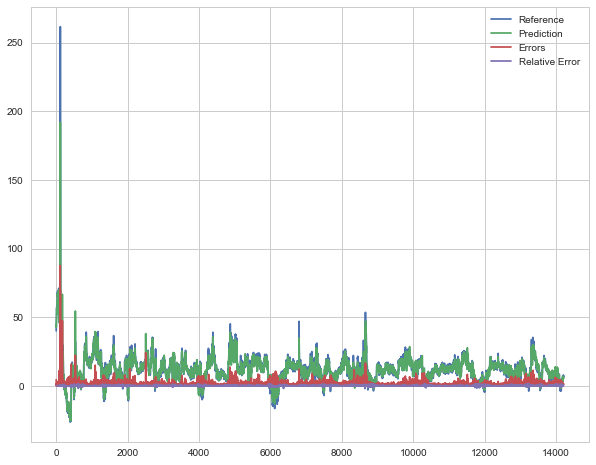

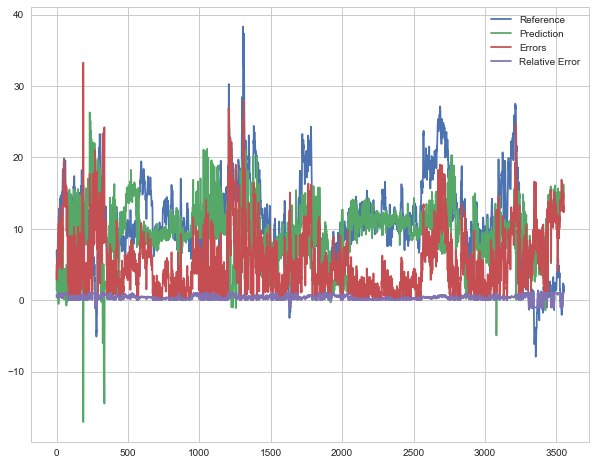

In [37]:
# Instantiate model 
model = RandomForestRegressor(n_estimators= 1000, random_state = 42)

## Train the model on training data
model.fit(train_X, train_y);

## Get model prediction
inv_yhat_train = evaluate(model, features[:n_train_periods], labels[:n_train_periods])
inv_yhat_test = evaluate(model, features[n_train_periods:], labels[n_train_periods:])

dataFrameTrain = pd.DataFrame(data = {'reference': labels[:n_train_periods], 'prediction': inv_yhat_train}, 
                              index = index[:n_train_periods])
dataFrameTest = pd.DataFrame(data = {'reference': labels[n_train_periods:], 'prediction': inv_yhat_test}, 
                             index = index[n_train_periods:])

dataFrameExport = dataFrameTrain.copy()
dataFrameExport = dataFrameExport.combine_first(dataFrameTest)

# Get model metrics
metrics_model_train = metrics(labels[:n_train_periods], inv_yhat_train)
metrics_model_test = metrics(labels[n_train_periods:], inv_yhat_test)

## Print Metrics
print '---'
print('\t\t Train \t\t Test')
for item in metrics_model_train.keys():
    print ('% s: \t %.5f \t %.5f ' % (item, metrics_model_train[item], metrics_model_test[item]))

##### Random Search with Cross Validation 

We perform here cross validated random search of the model hyperparameters, to later on retrieve the best parameters with a grid search around the best found results of the CV.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

Using **k-fold cross validation** below:

![](https://i.imgur.com/HLbgMSS.png)

Source: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
rf_random.fit(train_X, train_y)

rf_random.best_params_

Obtain the evaluation of the best and the baseline models

In [ ]:
## Evaluate the default model
base_model = RandomForestRegressor(n_estimators = 1000, random_state = 42)
base_model.fit(train_X, train_y)
## Get base model prediction
predictions_base_train = evaluate(base_model, features[:n_train_periods], labels[:n_train_periods])
predictions_base_test = evaluate(base_model, features[n_train_periods:], labels[n_train_periods:])

## Evaluate the best model
best_random = rf_random.best_estimator_
predictions_best_train = evaluate(best_random, features[:n_train_periods], labels[:n_train_periods])
predictions_best_test = evaluate(best_random, features[n_train_periods:], labels[n_train_periods:])

Now perform the gridsearch

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 3],
    'n_estimators': [200, 300, 400, 1000]
}

# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                           scoring = 'neg_mean_absolute_error', cv = 3, 
                           n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(train_X, train_y)

In [ ]:
print grid_search.best_params_
best_grid = grid_search.best_estimator_
print best_grid
predictions_best_grid_train = evaluate(best_grid, features[:n_train_periods], labels[:n_train_periods])
predictions_best_grid_test = evaluate(best_grid, features[n_train_periods:], labels[n_train_periods:])

If happy with the best predictions of the grid search, put them in the dataframe for plotting and archiving

In [ ]:
dataFrameTrain_best_grid = pd.DataFrame(data = {'reference': labels[:n_train_periods], 'prediction': predictions_best_grid_train}, 
                              index = index[:n_train_periods])
dataFrameTest_best_grid = pd.DataFrame(data = {'reference': labels[n_train_periods:], 'prediction': predictions_best_grid_test}, 
                             index = index[n_train_periods:])

model_name_ML = model_name_ML + '_best_grid_search'

dataFrameExport = dataFrameTrain_best_grid.copy()
dataFrameExport = dataFrameExport.combine_first(dataFrameTest_best_grid)

# Get model metrics
metrics_model_train = metrics(labels[:n_train_periods], predictions_best_train)
metrics_model_test = metrics(labels[n_train_periods:], predictions_best_test)

## Print Metrics
print('\t\t Train \t\t Test')
for item in metrics_model_train.keys():
    print ('% s: \t %.5f \t %.5f ' % (item, metrics_model_train[item], metrics_model_test[item]))
    
model = best_grid

#### Model plots

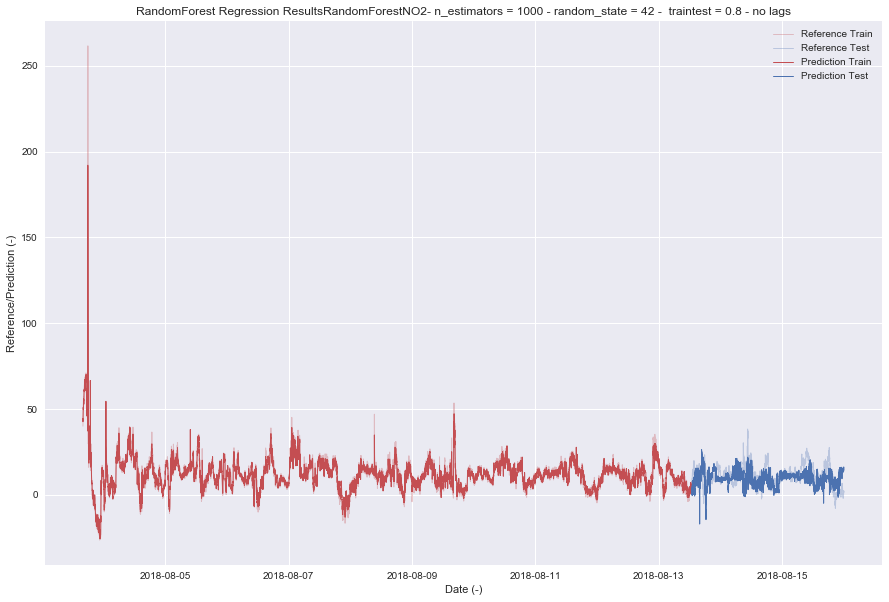

Variable: HUM_STATION_CASE Importance: 0.47
Variable: TEMP_STATION_CASE Importance: 0.3
Variable: NO2_MICS_RAW_STATION_CASE Importance: 0.24


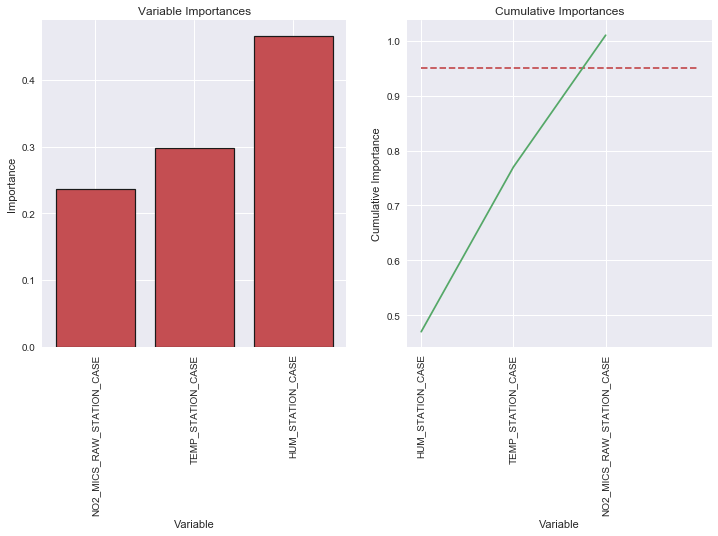

In [39]:
import matplotlib.pyplot as plot
%matplotlib inline

# Plot
fig = plot.figure(figsize=(15,10))

# Actual data
plot.plot(dataFrameTrain.index, dataFrameTrain['reference'],'r', linewidth = 1, label = 'Reference Train', alpha = 0.3)
plot.plot(dataFrameTest.index, dataFrameTest['reference'], 'b', linewidth = 1, label = 'Reference Test', alpha = 0.3)

# Fitted Values for Training
plot.plot(dataFrameTrain.index, dataFrameTrain['prediction'], 'r', linewidth = 1, label = 'Prediction Train')

# Fitted Values for Test
plot.plot(dataFrameTest.index, dataFrameTest['prediction'], 'b', linewidth = 1, label = 'Prediction Test')

plot.title('{} Regression Results'.format(modeltype) + model_name_ML)
plot.ylabel('Reference/Prediction (-)')
plot.xlabel('Date (-)')
plot.legend(loc='best')
plot.show()

## Model feature importances
importances = list(model.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(list_features[1:], importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
for pair in feature_importances:
    print ('Variable: {} Importance: {}'.format(pair[0], pair[1]))

# Reset style 
plot.style.use('seaborn')

# list of x locations for plotting
x_values = list(range(len(importances)))

fig= plot.figure(figsize = (12,6))
plot.subplot(1,2,1)
# Make a bar chart
plot.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)

# Tick labels for x axis
plot.xticks(x_values, list_features[1:], rotation='vertical')

# Axis labels and title
plot.ylabel('Importance'); plot.xlabel('Variable'); plot.title('Variable Importances');

# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)

plot.subplot(1,2,2)
# Make a line graph
plot.plot(x_values, cumulative_importances, 'g-')

# Draw line at 95% of importance retained
plot.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plot.xticks(x_values, sorted_features, rotation = 'vertical')

# Axis labels and title
plot.xlabel('Variable'); plot.ylabel('Cumulative Importance'); plot.title('Cumulative Importances');

### SVM Regressor

#### Train test split

In [51]:
# Import the model we are using
from sklearn.svm import SVR
from signal_utils import metrics
import matplotlib.pyplot as plot

from sklearn.model_selection import train_test_split

# Always have an item called 'REF', the rest can be anything
tuple_features = (['REF', 'NO2_AD_BASE1-60_FILTER'],
                 ['A', 'NO2_MICS_RAW'],
                 ['B', 'TEMP'],
                 ['C', 'HUM'])

device_name = 'STATION_CASE'
ratio_train = 0.8

dataframeModel = readings[test_model]['devices'][name_combined_data]['data'].copy()

modeltype = 'SVR'
model_name_ML = modeltype + 'NO2 - n_estimators = 1000 - random_state = 42 -  traintest = {} - no lags'.format(ratio_train)

min_date = '2018-08-01 00:00:00'
max_date = '2018-09-20 00:00:00'

### 

dataframeModel = dataframeModel[dataframeModel.index > min_date]
dataframeModel = dataframeModel[dataframeModel.index < max_date]

list_features = list()
for item in tuple_features: 
    if item[0] == 'REF':
        list_features.insert(0,item[1] + '_' + device_name)
        reference_name = item[1] + '_' + device_name
    else:
        list_features.append(item[1] + '_' + device_name)

dataframeModel = dataframeModel.loc[:, list_features]
dataframeModel = dataframeModel.dropna()
index = dataframeModel.index

labels = dataframeModel[reference_name]
features = dataframeModel.drop(reference_name, axis = 1)

# List of features for later use
feature_list = list(features.columns)

features = np.array(features)
labels = np.array(labels)

# Training and Testing Sets
train_X, test_X, train_y, test_y = train_test_split(features, labels, random_state = 42, 
                                                    test_size = 1-ratio_train, shuffle = True)

n_train_periods = train_X.shape[0]
print('Training X Shape:', train_X.shape)
print('Training y Shape:', train_y.shape)
print('Testing X Shape:', test_X.shape)
print('Testing y Shape:', test_y.shape)

('Training X Shape:', (14208, 3))
('Training y Shape:', (14208,))
('Testing X Shape:', (3553, 3))
('Testing y Shape:', (3553,))


#### Model Fit

Model Performance
	Average Error: 5.1164.
	Accuracy = 74.62%.
Model Performance
	Average Error: 3.2918.
	Accuracy = 75.84%.
---
		 Train 		 Test
avg_ref: 	 11.89110 	 11.18105 
sig_est: 	 3.50038 	 2.96666 
RMSD: 	 8.95825 	 4.60826 
avg_est: 	 11.84939 	 10.25626 
sigma_norm: 	 0.33625 	 0.51154 
sign_sigma: 	 -1.00000 	 -1.00000 
sig_ref: 	 10.41011 	 5.79947 
bias: 	 -0.04171 	 -0.92479 
RMSD_norm_unb: 	 0.87778 	 0.80033 
rsquared: 	 0.25948 	 0.36861 
normalised_bias: 	 -0.00401 	 -0.15946 


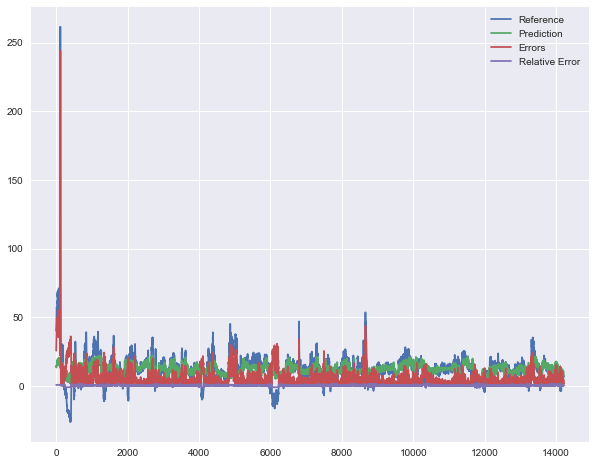

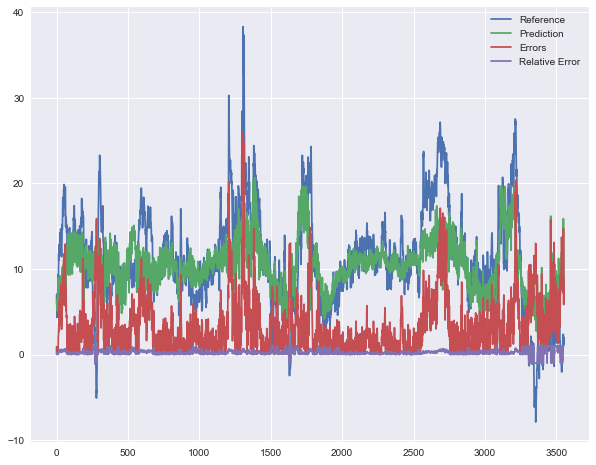

In [52]:
from ml_utils import evaluate
import numpy as np

# Instantiate model 
model = SVR(kernel='rbf')

## Train the model on training data
model.fit(train_X,train_y)

## Get model prediction
inv_yhat_train = evaluate(model, features[:n_train_periods], labels[:n_train_periods])
inv_yhat_test = evaluate(model, features[n_train_periods:], labels[n_train_periods:])

dataFrameTrain = pd.DataFrame(data = {'reference': labels[:n_train_periods], 'prediction': inv_yhat_train}, 
                              index = index[:n_train_periods])
dataFrameTest = pd.DataFrame(data = {'reference': labels[n_train_periods:], 'prediction': inv_yhat_test}, 
                             index = index[n_train_periods:])

dataFrameExport = dataFrameTrain.copy()
dataFrameExport = dataFrameExport.combine_first(dataFrameTest)

# Get model metrics
metrics_model_train = metrics(labels[:n_train_periods], inv_yhat_train)
metrics_model_test = metrics(labels[n_train_periods:], inv_yhat_test)

## Print Metrics
print '---'
print('\t\t Train \t\t Test')
for item in metrics_model_train.keys():
    print ('% s: \t %.5f \t %.5f ' % (item, metrics_model_train[item], metrics_model_test[item]))

### Model archiving

In [53]:
## Put everything in the dict
dictModel = readings[test_model]['devices'][name_combined_data]

# From https://hackmd.io/Y62wiJw0RaiBfU4Xhv8dQQ#
dictModel[model_name_ML] = dict()
dictModel[model_name_ML]['metrics'] = dict()
dictModel[model_name_ML]['metrics']['train'] = metrics_model_train
dictModel[model_name_ML]['metrics']['test'] = metrics_model_test

# Model Parameters
dictModel[model_name_ML]['parameters'] = dict()
dictModel[model_name_ML]['parameters']['features'] = tuple_features
dictModel[model_name_ML]['parameters']['ratio_train'] = n_train_periods

if modeltype == 'LSTM':
    dictModel[model_name_ML]['parameters']['scalerX'] = scalerX
    dictModel[model_name_ML]['parameters']['scalery'] = scalery
    dictModel[model_name_ML]['parameters']['n_lags'] = n_lags
    dictModel[model_name_ML]['parameters']['alpha_filter'] = alpha_filter

dictModel[model_name_ML]['data'] = dict()
dictModel[model_name_ML]['data']['train'] = dataFrameTrain
dictModel[model_name_ML]['data']['test'] = dataFrameTest
dictModel[model_name_ML]['model'] = model
dictModel[model_name_ML]['modelType'] = modeltype

# Put it back in the readings dataframe
readings[test_model]['devices'][name_combined_data]['model'][model_name_ML] = dictModel[model_name_ML]
readings[test_model]['devices'][model_name_ML] = dict()
readings[test_model]['devices'][model_name_ML]['data'] = dataFrameExport

### Model Export to Disk

In [47]:
from os.path import join
from sklearn.externals import joblib
import json

modelDirectory = join(rootDirectory, 'smartcitizen-iscape-models/')
modelTarget = 'MICS' # MICS, ALPHASENSE OR PMS
modelDirML = join(modelDirectory, 'Models/', modelTarget)
summaryDir = join(modelDirectory, 'Models/summary.json')
filenameML = join(modelDirML, model_name_ML)

# Save everything
joblib.dump(dictModel[model_name_ML]['metrics'], filenameML + '_metrics.sav')
joblib.dump(dictModel[model_name_ML]['parameters'], filenameML + '_parameters.sav')

if modeltype == 'LSTM':
    model_json = model.to_json()
    with open(filenameML + "_model.json", "w") as json_file:
        json_file.write(model_json)
    model.save_weights(filenameML + "_model.h5")

elif modeltype == 'RandomForest':
    joblib.dump(model, filenameML + '_model.sav', compress=3)
    
print("Model: \n\t" + model_name_ML + "\nSaved in:\n\t" + modelDirML)

summary = json.load(open(summaryDir, 'r'))
summary[modelTarget][model_name_ML] = dict()
summary[modelTarget][model_name_ML] = modeltype

with open(summaryDir, 'w') as json_file:
    json_file.write(json.dumps(summary))
    json_file.close()

Model: 
	SVRNO2 - n_estimators = 1000 - random_state = 42 -  traintest = 0.8 - no lags
Saved in:
	/Users/macoscar/Documents/04_Projects/02_FabLab/02_SmartCitizen/04_iScape/99_DataAnalysis/smartcitizen-iscape-models/Models/MICS


## Model Comparison

### TimeSeries Comparison

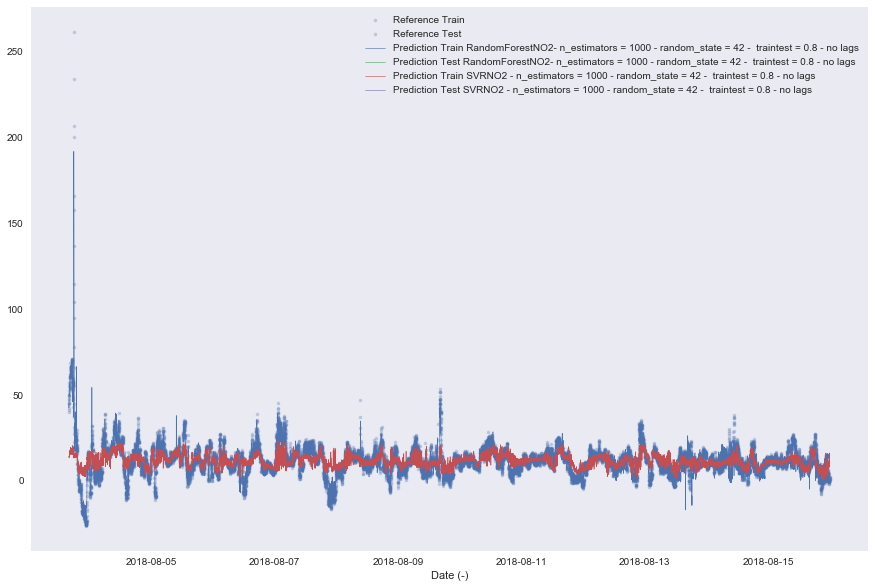

In [57]:
import matplotlib.pyplot as plt
import plotly.tools as tls
%matplotlib inline

fig = plt.figure(figsize=(15,10))
referencePlotted = False
        
for device in readings[test_model]['devices']:
    if 'model' in readings[test_model]['devices'][device]:
        for model_name in readings[test_model]['devices'][device]['model']:

            ratio_train = readings[test_model]['devices'][name_combined_data]['model'][model_name]['parameters']['ratio_train']

            data = readings[test_model]['devices'][model_name]['data']
                
            total_len = len(data.index)
            n_train_periods = int(round(total_len*ratio_train))
    
            dataframeTrain = data.iloc[:n_train_periods,:]
            dataframeTest = data.iloc[n_train_periods:,:]
                        
            if (not referencePlotted):
                plt.plot(dataframeTrain.index, dataframeTrain['reference'], 'b.', label = 'Reference Train', alpha = 0.3)
                plt.plot(dataframeTest.index, dataframeTest['reference'], 'b.', label = 'Reference Test', alpha = 0.3)
                referencePlotted = True
            
            plt.plot(dataframeTrain.index, dataframeTrain['prediction'], linewidth = 0.6, label = 'Prediction Train ' + model_name)
            plt.plot(dataframeTest.index, dataframeTest['prediction'], linewidth = 0.6, label = 'Prediction Test ' + model_name)

plt.legend(loc = 'best')
# plt.ylabel(str(readings[test_model]['devices'][name_combined_data]['model'][model_name]['parameters']['features']["ref"][1]))
plt.xlabel('Date (-)')
plt.grid()
# plt.title('Model Comparison for ' + str(readings[test_model]['devices'][name_combined_data]['model'][model_name]['parameters']['features']["ref"][1]))

### Scatter Comparison

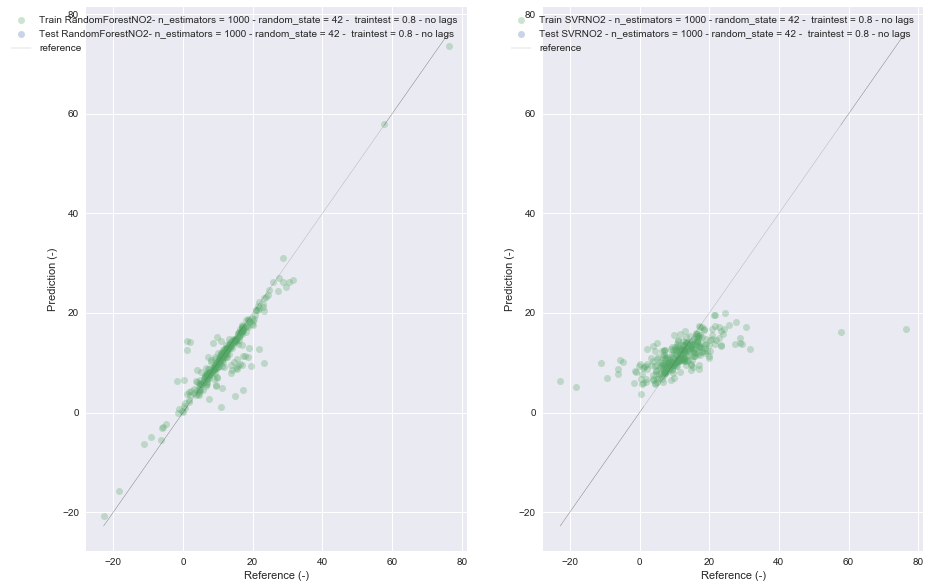

In [56]:
import matplotlib.pyplot as plot
from matplotlib import gridspec
import math

number_of_subplots = 0
for device in readings[test_model]['devices']:
    if 'model' in readings[test_model]['devices'][device]:
        for model_name in readings[test_model]['devices'][device]['model']:
            number_of_subplots += 1
            

if number_of_subplots % 2 == 0: cols = 2
else: cols = 3
rows = int(math.ceil(number_of_subplots / cols))
gs = gridspec.GridSpec(rows, cols)
fig = plot.figure(figsize=(15,10))

fig.tight_layout()
n = 0

for device in readings[test_model]['devices']:
    if 'model' in readings[test_model]['devices'][device]:
        for model_name in readings[test_model]['devices'][device]['model']:
            
            ratio_train = readings[test_model]['devices'][name_combined_data]['model'][model_name]['parameters']['ratio_train']

            data = readings[test_model]['devices'][model_name]['data']
            dataVal = data.groupby(pd.Grouper(freq='1H')).aggregate(np.mean)    
            total_len = len(dataVal.index)
            n_train_periods = int(round(total_len*ratio_train))
    
            dataframeTrain = dataVal.iloc[:n_train_periods,:]
            dataframeTest = dataVal.iloc[n_train_periods:,:]

            ax = fig.add_subplot(gs[n])
            n += 1          
            plot.plot(dataframeTrain['reference'], dataframeTrain['prediction'], 'go', label = 'Train ' + model_name, alpha = 0.3)
            plot.plot(dataframeTest['reference'], dataframeTest['prediction'], 'bo', label = 'Test ' + model_name, alpha = 0.3)

            plot.plot(dataframeTrain['reference'], dataframeTrain['reference'], 'k', linewidth = 0.4, alpha = 0.3)

            plot.legend(loc = 'best')
            plot.ylabel('Prediction (-)')
            plot.xlabel('Reference (-)')

### Model Metrics Comparison

In [ ]:
from math import sqrt
import matplotlib.pyplot as plot
%matplotlib inline

for model in readings[test_model]['devices'][name_combined_data]['model']:
    print '-----------------------------------------------------'
    print '\nModel Name: {}'.format(model)
    print '\n\t\t Train \t\t Test'
    metrics_model = readings[test_model]['devices'][name_combined_data]['model'][model]['metrics']
    for item in metrics_model['train']:
        print ('% s: \t %.5f \t %.5f ' % (item, metrics_model['train'][item], metrics_model['test'][item]))

def minRtarget(targetR):
    return sqrt(1+ np.power(targetR,2)-2*np.power(targetR,2))

_plot_train = True
_dataframe = readings[test_model]['devices'][name_combined_data]

def targetDiagram(dataframe, plot_train):

    targetR20 = 0.5
    targetR0 = sqrt(targetR20)
    MR0 = minRtarget(targetR0)
    targetR21 = 0.7
    targetR1 = sqrt(targetR21)
    MR1 = minRtarget(targetR1)
    targetR22 = 0.9
    targetR2 = sqrt(targetR22)
    MR2 = minRtarget(targetR2)


    fig  = plot.figure(figsize=(13,13))
    for model in readings[test_model]['devices'][name_combined_data]['model']:
        metrics_model = dataframe[model]['metrics']
    
        if plot_train == True:
            plot.scatter(metrics_model['train']['sign_sigma']*metrics_model['train']['RMSD_norm_unb'], metrics_model['train']['normalised_bias'], label = 'Train ' + model)
        plot.scatter(metrics_model['test']['sign_sigma']*metrics_model['test']['RMSD_norm_unb'], metrics_model['test']['normalised_bias'], label = 'Test ' + model)
    
    ## Add circles
    ax = plot.gca()
    circle1 = plot.Circle((0, 0), 1, linewidth = 0.8, color='k', fill =False)
    circleMR0 = plot.Circle((0, 0), MR0, linewidth = 0.8, color='r', fill=False)
    circleMR1 = plot.Circle((0, 0), MR1, linewidth = 0.8, color='y', fill=False)
    circleMR2 = plot.Circle((0, 0), MR2, linewidth = 0.8, color='g', fill=False)
    
    circle3 = plot.Circle((0, 0), 0.01, color='k', fill=True)
    
    ## Add annotations
    ax.add_artist(circle1)
    ax.annotate('R2 < 0',
                xy=(1, 0), xycoords='data',
                xytext=(-35, 10), textcoords='offset points')
    
    ax.add_artist(circleMR0)
    ax.annotate('R2 < ' + str(targetR20),
                xy=(MR0, 0), xycoords='data',
                xytext=(-35, 10), textcoords='offset points', color = 'r')
    
    ax.add_artist(circleMR1)
    ax.annotate('R2 < ' + str(targetR21),
                xy=(MR1, 0), xycoords='data',
                xytext=(-45, 10), textcoords='offset points', color = 'y')
    
    
    ax.add_artist(circleMR2)
    ax.annotate('R2 < ' + str(targetR22),
                xy=(MR2, 0), xycoords='data',
                xytext=(-45, 10), textcoords='offset points', color = 'g')
    ax.add_artist(circle3)
    
    ## Display and others
    plt.axhline(0, color='black', linewidth = 0.5)
    plt.axvline(0, color='black', linewidth = 0.5)
    plot.legend(loc='best')
    plot.xlim([-1.1,1.1])
    plot.ylim([-1.1,1.1])
    plot.title('Target Diagram')
    plot.ylabel('Normalised Bias (-)')
    plot.xlabel("RMSD*'")
    plot.show()
    

targetDiagram(_dataframe, _plot_train)

## Model Evaluation

### Data Quality Objectives
Explained here http://dx.doi.org/10.1016/j.envint.2016.12.007

Sensor values Y, reference values x

In [ ]:
test_model = '2018-08_INT_STATION_TEST_SUMMER_HOLIDAYS'

for device in readings[test_model]['devices']:
    if 'model' in readings[test_model]['devices'][device]:
        for model_name in readings[test_model]['devices'][device]['model']:
            print '\t' + model_name

In [ ]:
from scipy.stats.stats import linregress
import matplotlib.pyplot as plot
import numpy as np
%matplotlib inline

def fUEREL(ux, values_x, values_Y):
    def RSS(values_x, values_Y, intercept, slope):
        pre_sum_1 = np.power(values_Y - intercept - np.multiply(slope, values_x), 2)
        # pre_sum_2 = np.power(values_Y / (intercept + np.multiply(slope, values_x)) - 1, 2)
        
        # fig, axes = plot.subplots(1, 2, figsize=(15,10))
        # axes[0].plot(pre_sum_1)
        # axes[1].plot(pre_sum_2)

        RSS = np.sum(np.power(pre_sum_1,2))
        
        return RSS
    
    slope, intercept, _, _, _ = linregress(values_x, values_Y)
    # fig = plot.figure(figsize=(15,10))
    # plot.plot(slope*values_x + intercept, label='Sensor')
    # plot.plot(values_Y)
    
    RSS = RSS(values_x, values_Y, intercept, slope)
    n = len(values_x)
    if len(values_Y) != n: return
    A = RSS/(n-2)-np.power(ux,2)
    B = np.power(intercept + (slope-1)*values_x, 2)
    C = np.power(A + B, 0.5)
    UEREL = np.divide(2*C, values_Y)
    
    return UEREL

In [ ]:
import matplotlib.pyplot as plot
from matplotlib import gridspec
import math

dqo_table = (['PM', 50],
            ['O3', 30],
            ['CO',25],
            ['NO',25],
            ['NO2',25],
            ['NOX',25],
            ['SO2',25])

ux = 0
test_model = '2018-08_INT_STATION_TEST_SUMMER_HOLIDAYS'

## ---

number_of_subplots = 0
for device in readings[test_model]['devices']:
    if 'model' in readings[test_model]['devices'][device]:
        for model_name in readings[test_model]['devices'][device]['model']:
            number_of_subplots += 1

if number_of_subplots % 2 == 0: cols = 2
else: cols = 3
    
rows = int(math.ceil(number_of_subplots / cols))
gs = gridspec.GridSpec(rows, cols)
fig = plot.figure(figsize=(15,10))

fig.tight_layout()
n = 0

for device in readings[test_model]['devices']:
    if 'model' in readings[test_model]['devices'][device]:
        for model_name in readings[test_model]['devices'][device]['model']:
                        
            data = readings[test_model]['devices'][model_name]['data']
            dataVal = data.groupby(pd.Grouper(freq='1H')).aggregate(np.mean)
            values_x = dataVal['reference'].values
            values_Y = dataVal['prediction'].values
            
            total_len = len(data.index)
            n_train_periods = int(round(total_len*ratio_train))

            ax = fig.add_subplot(gs[n])
            n += 1      

            uerel = 100*fUEREL(ux, values_x, values_Y)
            
            plot.plot(values_x, uerel, 'ko')
            plot.xlabel('Ref. conc [ppb]')
            plot.ylabel('Rel. Exp. Unc (%)')
            plot.ylim([0, 100])
            plot.title(model_name)
            plot.axhline(y=25, color='r', linestyle='-')
            

### Match Score

# Data Model Load

## Import Model

In [ ]:
from os.path import join
from sklearn.externals import joblib
from keras.models import model_from_json
import json
from IPython.display import display
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display, clear_output, Markdown

modelDir = join(rootDirectory, 'smartcitizen-iscape-models/Models/')

dict_models = dict()
with open(join(modelDir, 'summary.json'), 'r') as summary_file:
    dict_models = json.load(summary_file)
    
selectedModels = tuple()
def selectModels(Source):
    global selectedModels
    selectedModels = list(Source)
    
def loadModel(b):
    clear_output()
    if len(selectedModels)>0:
        filename = join(modelDir, target_drop.value, selectedModels[0])
        
        global loaded_model
        global loaded_params
        global loaded_metrics

        if type_drop.value == "LSTM":
            # ML Model
            # Load Model and weights
            json_file = open(filename + "_model.json", "r")
            loaded_model_json = json_file.read()
            json_file.close()
        
            loaded_model = model_from_json(loaded_model_json)
            loaded_model.load_weights(filename + "_model.h5")
        elif type_drop.value == "OLS":
            # OLS Model
            loaded_model = joblib.load(filename + '_model.sav')
        elif type_drop.value == 'RandomForest':
            loaded_model = joblib.load(filename + '_model.sav')
            
        # Load params and metrics
        loaded_params = joblib.load(filename + '_parameters.sav')
        loaded_metrics = joblib.load(filename + '_metrics.sav')
        
        display(Markdown('## Model Load'))
        display(Markdown("Loaded " + selectedModels[0] + " from disk"))
        display(Markdown('**Model Type** (*loaded_model*):' ))
        display(loaded_model)
        display(Markdown('**Model Parameters** (*loaded_params*)'))
        display(loaded_params)
        display(Markdown('**Model Metrics** (*loaded_metrics*)'))
        display(loaded_metrics)
    else:
        print 'Select one model to load'
    
def show_models(target, mtype):
    list_models = list()
    for item in dict_models[target]:
        if dict_models[target][item] == mtype:
            list_models.append(item)
    models.options = list(list_models)

display(widgets.HTML('<hr><h4>Import Local Models</h4>'))

type_drop = widgets.Dropdown(options = ['LSTM', 'RandomForest', 'OLS'],
                                  value = 'LSTM',
                                  description = 'Model Type',
                                  layout = widgets.Layout(width='300px'))

target_drop = widgets.Dropdown(options = ['ALPHASENSE', 'MICS', 'PMS'],
                                  value = 'MICS',
                                  description = 'Model Target',
                                  layout = widgets.Layout(width='300px'))

model_type_drop = widgets.interactive(show_models, 
                                target=target_drop,
                                mtype = type_drop, 
                                layout=widgets.Layout(width='700px'))

models = widgets.SelectMultiple(selected_labels = selectedModels, 
                           layout=widgets.Layout(width='700px'))

models_interact = widgets.interactive(selectModels,
                                     Source = models,
                                     layout = widgets.Layout(width='700px'))
display(model_type_drop)
display(models)

loadB = widgets.Button(description='Load Model')
loadB.on_click(loadModel)

buttonBox = widgets.HBox([loadB])
display(buttonBox)

## Apply OLS Model

In [ ]:
from linear_regression_utils import predict_OLS, prep_data_OLS
import matplotlib.pyplot as plot

# ---

# Input
test_name = '2018-08_INT_STATION_TEST_SUMMER_HOLIDAYS'
device_name = 'STATION CHIMNEY'
prediction_name = 'CO_MICS_ppm'
min_date = '2018-08-01 00:00:00'
max_date = '2018-09-20 00:00:00'

# ---

# Retrieve model
model_predict = loaded_model
tuple_feat_predict = loaded_params['features']['items']
alpha_filter = loaded_params['alpha_filter']

## Prep Dataframe

list_features = list()
for item in tuple_feat_predict:
    list_features.append(item[1])
    if item[1] not in readings[test_name]['devices'][device_name]['data'].columns:
        print '{} not in {}'.format(item[1], test_name)
        break

dataframeModel = readings[test_name]['devices'][device_name]['data'].loc[:,list_features]
dataframeModel = dataframeModel.dropna()
dataframeModel = dataframeModel[dataframeModel.index > min_date]
dataframeModel = dataframeModel[dataframeModel.index < max_date]
dataframeModel.dropna()

## Predict the model results
datapredict = prep_data_OLS(dataframeModel, tuple_feat_predict, 1, alpha_filter, device_name)

prediction = predict_OLS(model_predict, datapredict, False, False, 'test')

dataframe = pd.DataFrame(prediction, columns = [prediction_name]).set_index(datapredict['index'])
readings[test_name]['devices'][device_name]['data'][prediction_name] = dataframe.loc[:,prediction_name]

# Plot
fig = plot.figure(figsize=(15,10))

# Actual data
try:
    plot.plot(dataFrameTrain.index, dataFrameTrain['reference'],'r', label = 'Reference Train', alpha = 0.3)
    plot.plot(dataFrameTest.index, dataFrameTest['reference'], 'b', label = 'Reference Test', alpha = 0.3)
    # Fitted Values for Training
    plot.plot(dataFrameTrain.index, dataFrameTrain['prediction'], 'r', label = 'Prediction Train')
    # Fitted Values for Test
    plot.plot(dataFrameTest.index, dataFrameTest['prediction'], 'b', label = 'Prediction Test')
except:
    print 'No data available from model training'
    
# Fitted values
plot.plot(dataframe.index, dataframe.loc[:, prediction_name], 'g')
# plot.ylim([0,1.5])
plot.grid(True)
plot.xlabel('Time')
plot.ylabel('Model' + prediction_name)
plot.show()

## Apply ML Model

In [ ]:
# ---

# Input
test_name = '2018-11_EXT_SALEM_TEST'
device_name = 'Miltown'
prediction_name = 'NO2_MICS_ppm'
min_date = '2018-01-01 00:00:00'
max_date = '2018-12-20 00:00:00'

# Temporary
readings[test_name]['devices'][device_name]['data']['NO2_MICS_RAW'] = readings[test_name]['devices'][device_name]['data']['NO2_MICS_RAW']*readings['2018-08_INT_STATION_TEST_SUMMER_HOLIDAYS']['devices']['STATION_CASE']['data']['NO2_MICS_RAW'].mean()/readings[test_name]['devices'][device_name]['data']['NO2_MICS_RAW'].mean()

# ---

model_predict = loaded_model
tuple_feat_predict = loaded_params['features'] 
print tuple_feat_predict

if type_drop.value == 'LSTM':
    scalerX_predict = loaded_params['scalerX']
    scalery_predict = loaded_params['scalery']
    n_lags = loaded_params['n_lags']
    alpha_filter = loaded_params['alpha_filter']
    
n_train_periods = loaded_params['ratio_train']

## Prep Dataframe
dataframeModel = readings[test_name]['devices'][device_name]['data']
dataframeModel = dataframeModel[dataframeModel.index > min_date]
dataframeModel = dataframeModel[dataframeModel.index < max_date]

list_features_predict = list()
for item in tuple_feat_predict: 
    if item[0] != 'REF':
        list_features_predict.append(item[1])

### LSTM

In [ ]:
from ml_utils import prep_prediction_ML
from ml_utils import predict_ML
import matplotlib.pyplot as plot
%matplotlib inline

test_X, index_pred, n_obs = prep_prediction_ML(dataframeModel, list_features_predict, n_lags, alpha_filter, scalerX_predict, verbose = True)
prediction = predict_ML(model_predict, test_X, n_lags, scalery_predict)
dataframe = pd.DataFrame(prediction, columns = [prediction_name]).set_index(index_pred)
readings[test_name]['devices'][device_name]['data'][prediction_name] = dataframe.loc[:,prediction_name]

# Plot
fig = plot.figure(figsize=(15,10))

# Actual data
try:
    plot.plot(dataFrameTrain.index, dataFrameTrain['reference'],'r', label = 'Reference Train', alpha = 0.3)
    plot.plot(dataFrameTest.index, dataFrameTest['reference'], 'b', label = 'Reference Test', alpha = 0.3)
    # Fitted Values for Training
    plot.plot(dataFrameTrain.index, dataFrameTrain['prediction'], 'r', label = 'Prediction Train')
    # Fitted Values for Test
    plot.plot(dataFrameTest.index, dataFrameTest['prediction'], 'b', label = 'Prediction Test')
except:
    print 'No data available from model training'
    
# Fitted values
plot.plot(dataframe.index, dataframe.loc[:, prediction_name], 'g')
plot.ylim([0,1.5])
plot.grid(True)

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plot
% matplotlib inline

# dataframeModel = dataframeModel.groupby(pd.Grouper(freq='90S')).aggregate(np.mean)
dataframeModel = dataframeModel.loc[:, list_features_predict]
dataframeModel = dataframeModel.dropna()
index_pred = dataframeModel.index

features = np.array(dataframeModel)

## Get model prediction
prediction = model_predict.predict(features)

dataframe = pd.DataFrame(prediction, columns = [prediction_name]).set_index(index_pred)
# dataframe = dataframe.groupby(pd.Grouper(freq='10Min')).aggregate(np.mean)    

readings[test_name]['devices'][device_name]['data'][prediction_name] = dataframe.loc[:,prediction_name]
# print readings[test_name]['devices'][device_name]['data'][prediction_name]
# Plot
fig = plot.figure(figsize=(15,10))

# Actual data
try:
    plot.plot(dataFrameTrain.index, dataFrameTrain['reference'],'r', label = 'Reference Train', alpha = 0.3)
    plot.plot(dataFrameTest.index, dataFrameTest['reference'], 'b', label = 'Reference Test', alpha = 0.3)
    # Fitted Values for Training
    plot.plot(dataFrameTrain.index, dataFrameTrain['prediction'], 'r', label = 'Prediction Train')
    # Fitted Values for Test
    plot.plot(dataFrameTest.index, dataFrameTest['prediction'], 'b', label = 'Prediction Test')
except:
    print 'No data available from model training'
    
# Fitted values
plot.plot(dataframe.index, dataframe.loc[:, prediction_name], 'g', label = 'Predicted value')
# plot.xlim(['2018-11-01','2018-11-20'])
plot.grid(True)
plot.legend(loc='best')